<a href="https://colab.research.google.com/github/koitran14/AI-researcher-workplace/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**


## **Library & data import**

In [ ]:
!pip install optuna

In [ ]:
!pip install catboost

In [ ]:
# To handle the data
import pandas as pd
import numpy as np

# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess the data
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**About the data (Description of attributes)**

* age: Age of the patient

* anaemia: Decrease of red blood cells or hemoglobin (Boolean)

* creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

* diabetes: If the patient has diabetes (Boolean)

* ejection_fraction: Percentage of blood leaving the heart at each contraction

* high_blood_pressure: If the patient has hypertension (Boolean)

* platelets: Platelets in the blood (kiloplatelets/mL)

* serum_creatinine: Level of serum creatinine in the blood (mg/dL)

* serum_sodium: Level of serum sodium in the blood (mEq/L)

* sex: Woman = 0, Man = 1

* smoking: If the patient smokes or not (Boolean)

* time: Follow-up period (days)

* DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)





*Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)*

## **Explore the Dataset**

### **Overview:**

In [ ]:
df.shape
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset has 299 rows and 13 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


* **Note:** There's no duplicated rows in this dataset.

### **Check outliers**

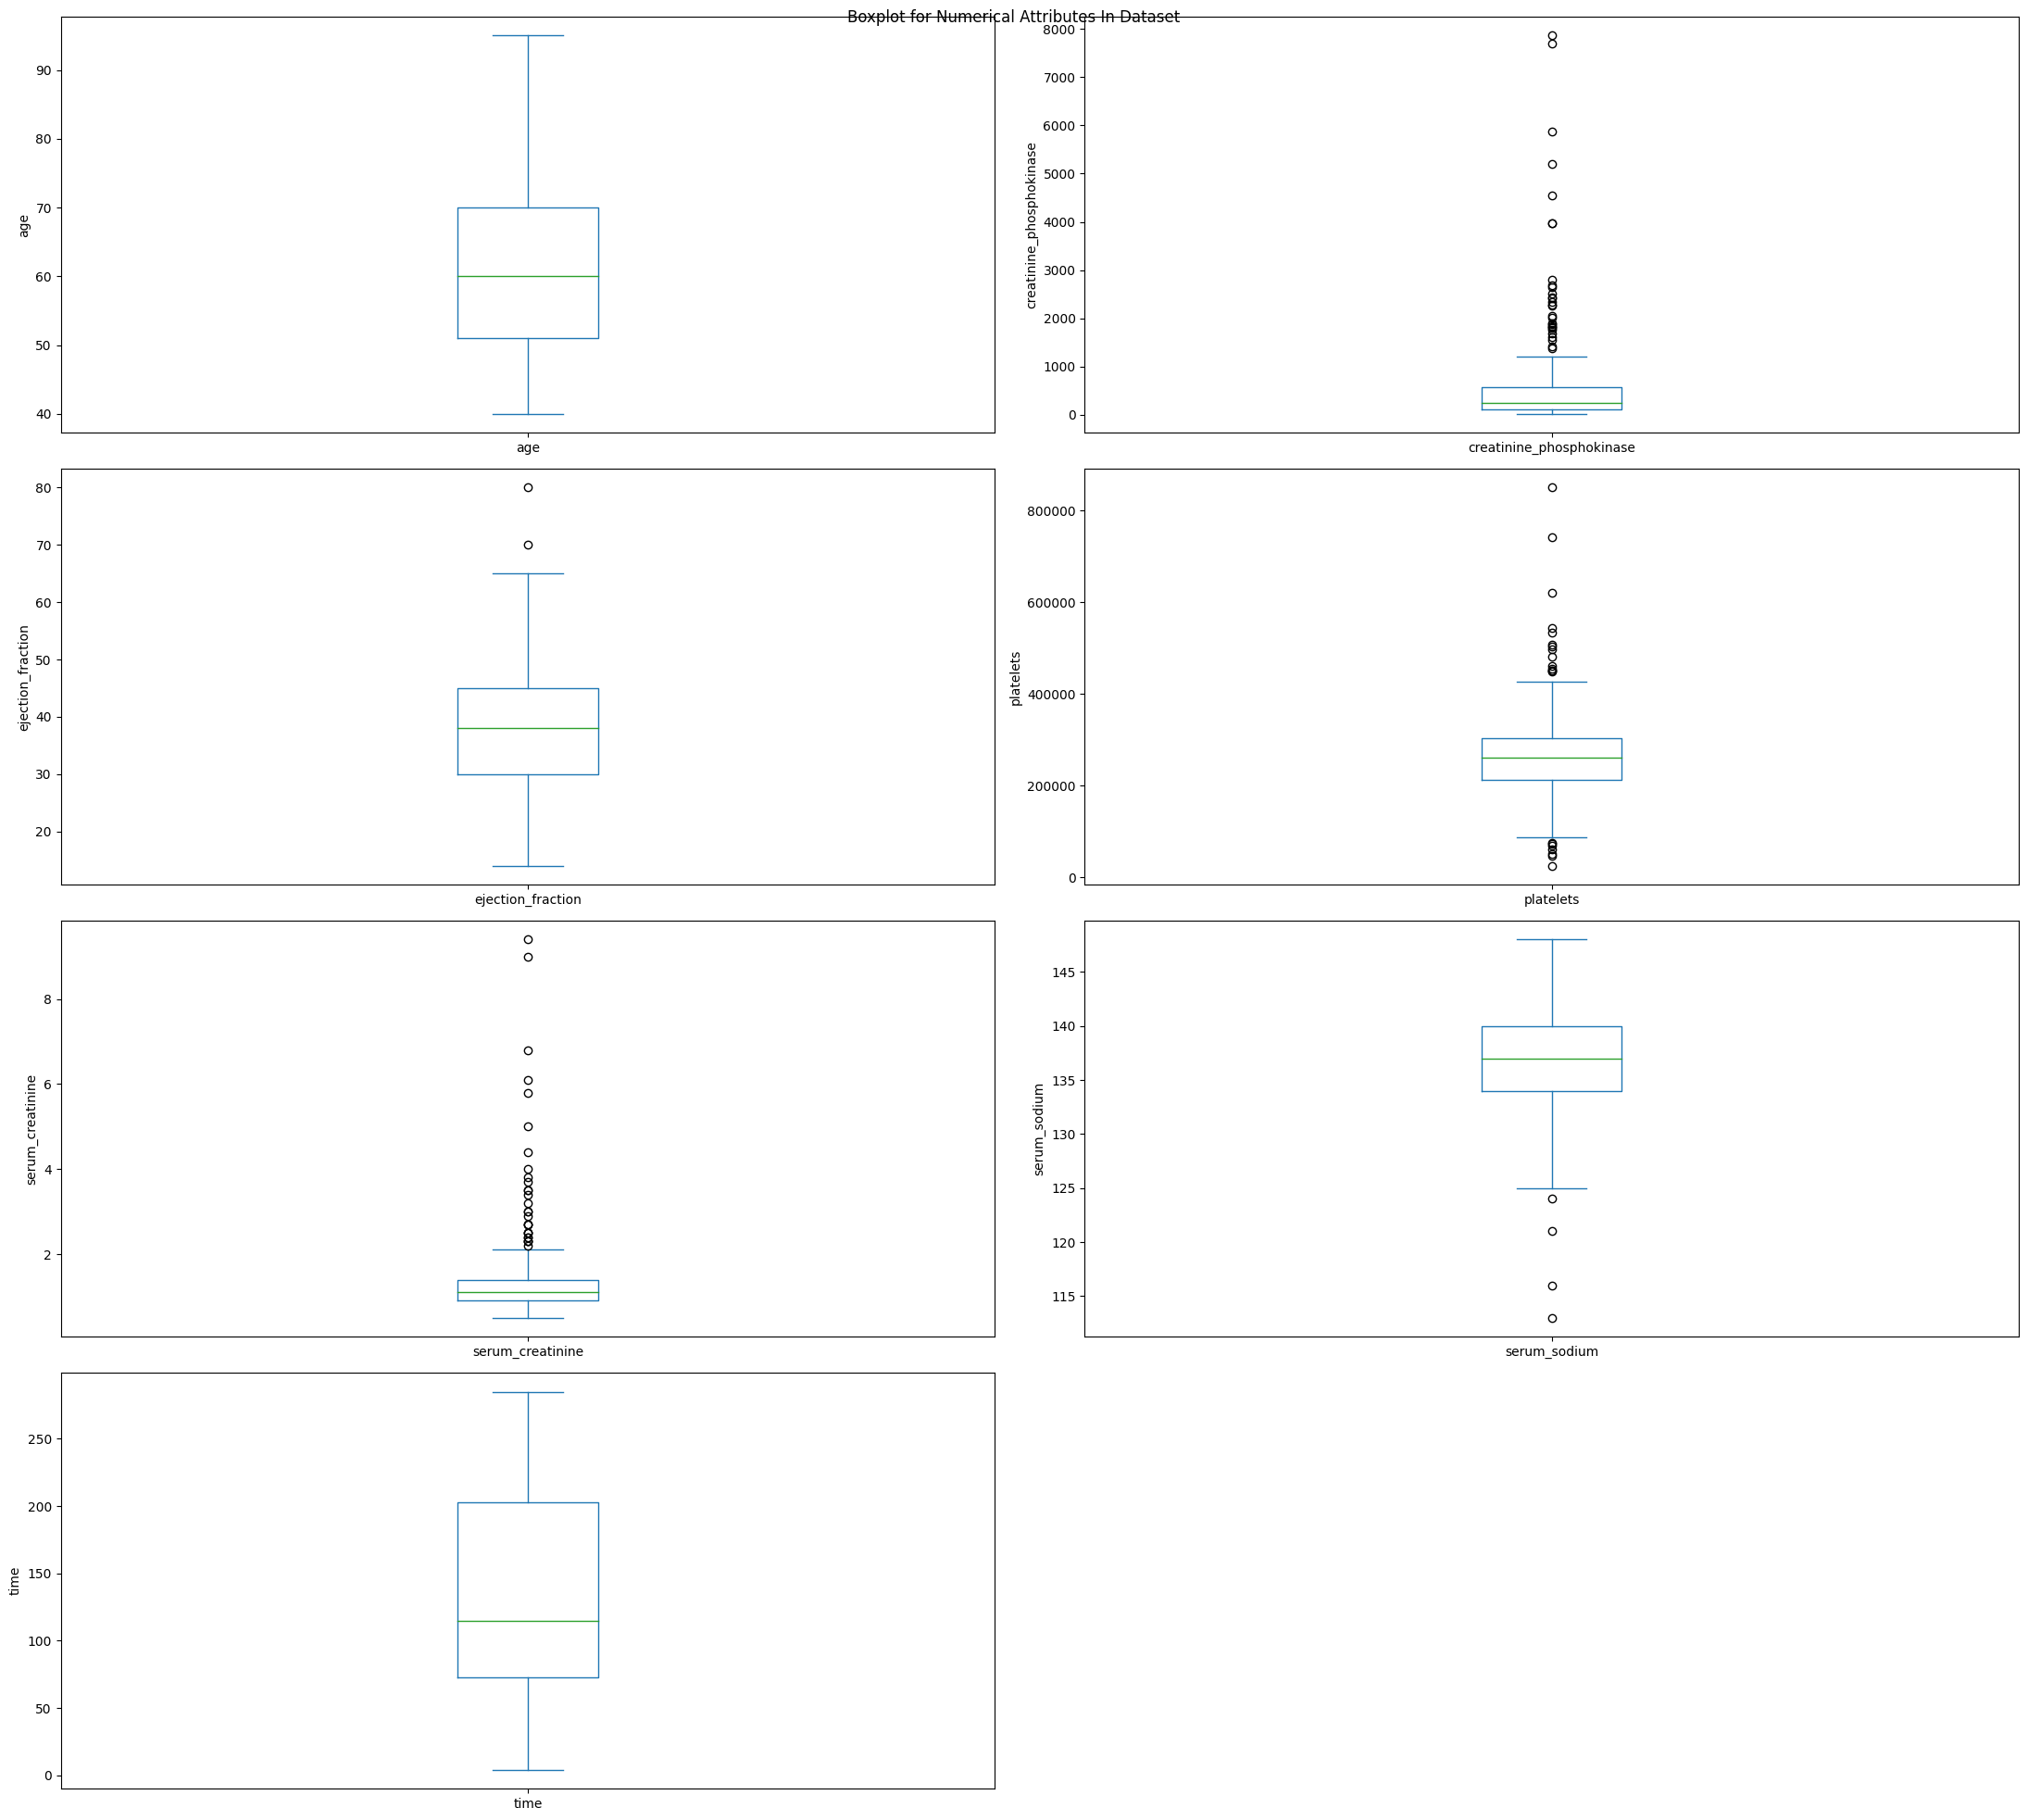

In [ ]:
# Specify the column names of the attributes you want to include
specific_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create subplots for specific columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 20))
# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(specific_cols):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x')

# Hide empty subplots
for j in range(len(specific_cols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Boxplot for Numerical Attributes In Dataset')
plt.tight_layout()
plt.show()

* **Notation:** There're outliers existing in dataset.

### **Check imbalance in dataset**

* **Check the balance of key attribute's distribution**

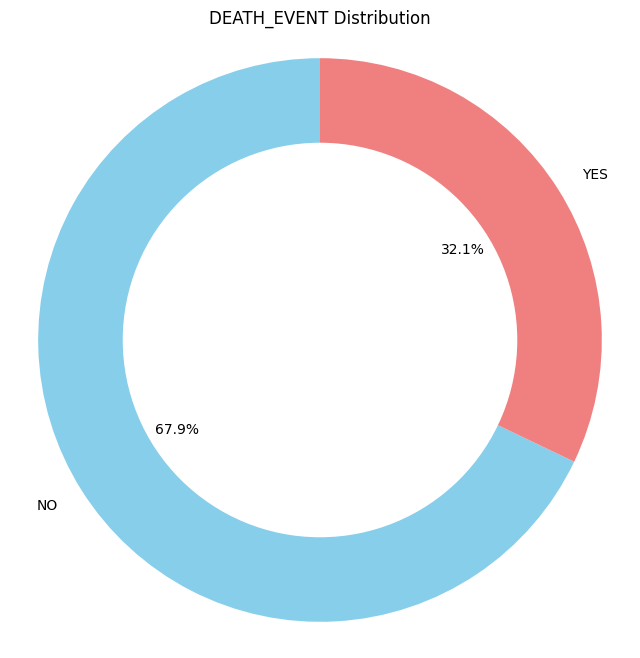

In [ ]:
# Mapping labels to custom values
label_map = {1: 'YES', 0: 'NO'}

# Map the 'DEATH_EVENT' column using the label_map dictionary
df_graph = df.copy()
df_graph['DEATH_EVENT_label'] = df_graph['DEATH_EVENT'].map(label_map)

# Count the occurrences of each DEATH_EVENT value
death_event_counts = df_graph['DEATH_EVENT_label'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(death_event_counts, labels=death_event_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('DEATH_EVENT Distribution')

# Draw a white circle at the center to create the donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

* **Check the balance density between target with other categorical variables:**

In [ ]:
# Analyzing the distribution of categorical variables
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
categorical_distributions = df[categorical_columns].apply(lambda x: x.value_counts(normalize=True))

categorical_distributions

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0.568562,0.58194,0.648829,0.351171,0.67893
1,0.431438,0.41806,0.351171,0.648829,0.32107


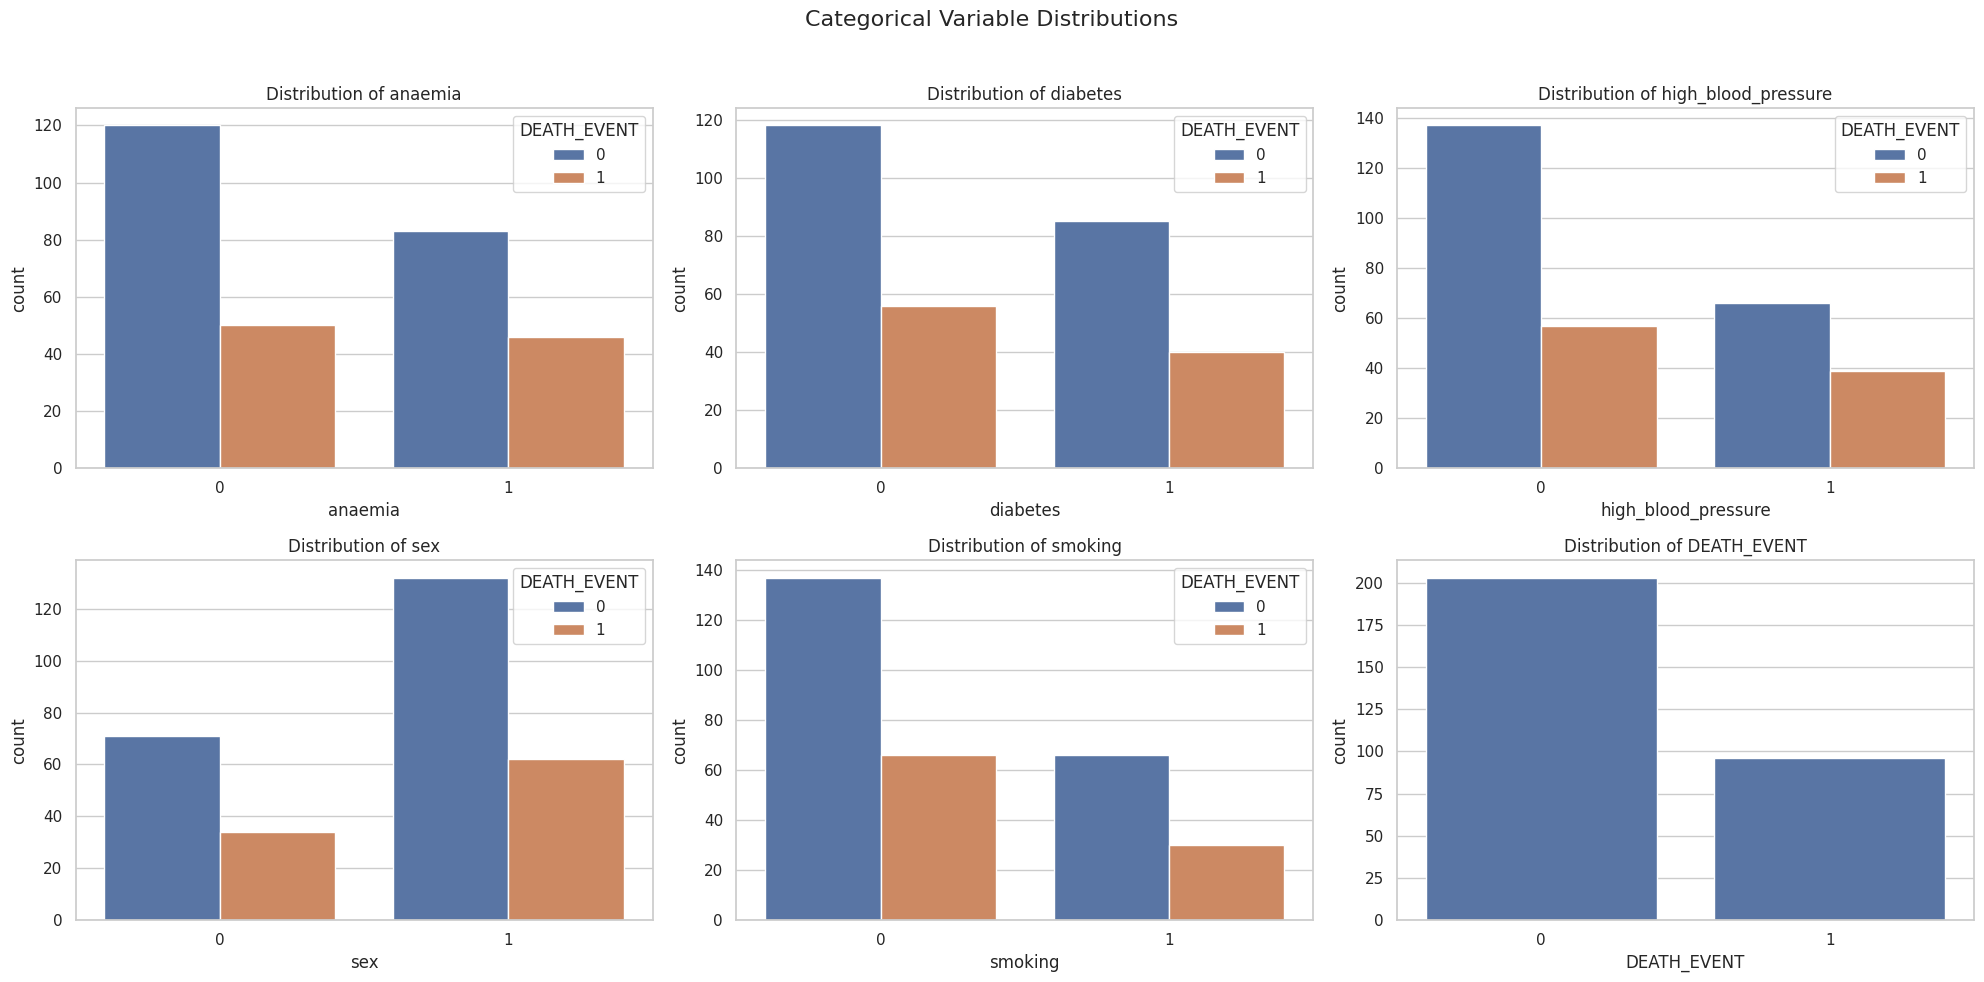

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Function to plot bar plots for categorical variables
def plot_categorical_distributions(data, columns, target):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.countplot(data=data, x=col, hue=target)
        plt.title(f'Distribution of {col}')
    plt.subplot(2, 3, len(columns)+1)
    sns.countplot(data=data, x=target)
    plt.title(f'Distribution of {target}')
    plt.suptitle('Categorical Variable Distributions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plot_categorical_distributions(df, categorical_columns, 'DEATH_EVENT')

* **Check the balance of target with continuous variables:**

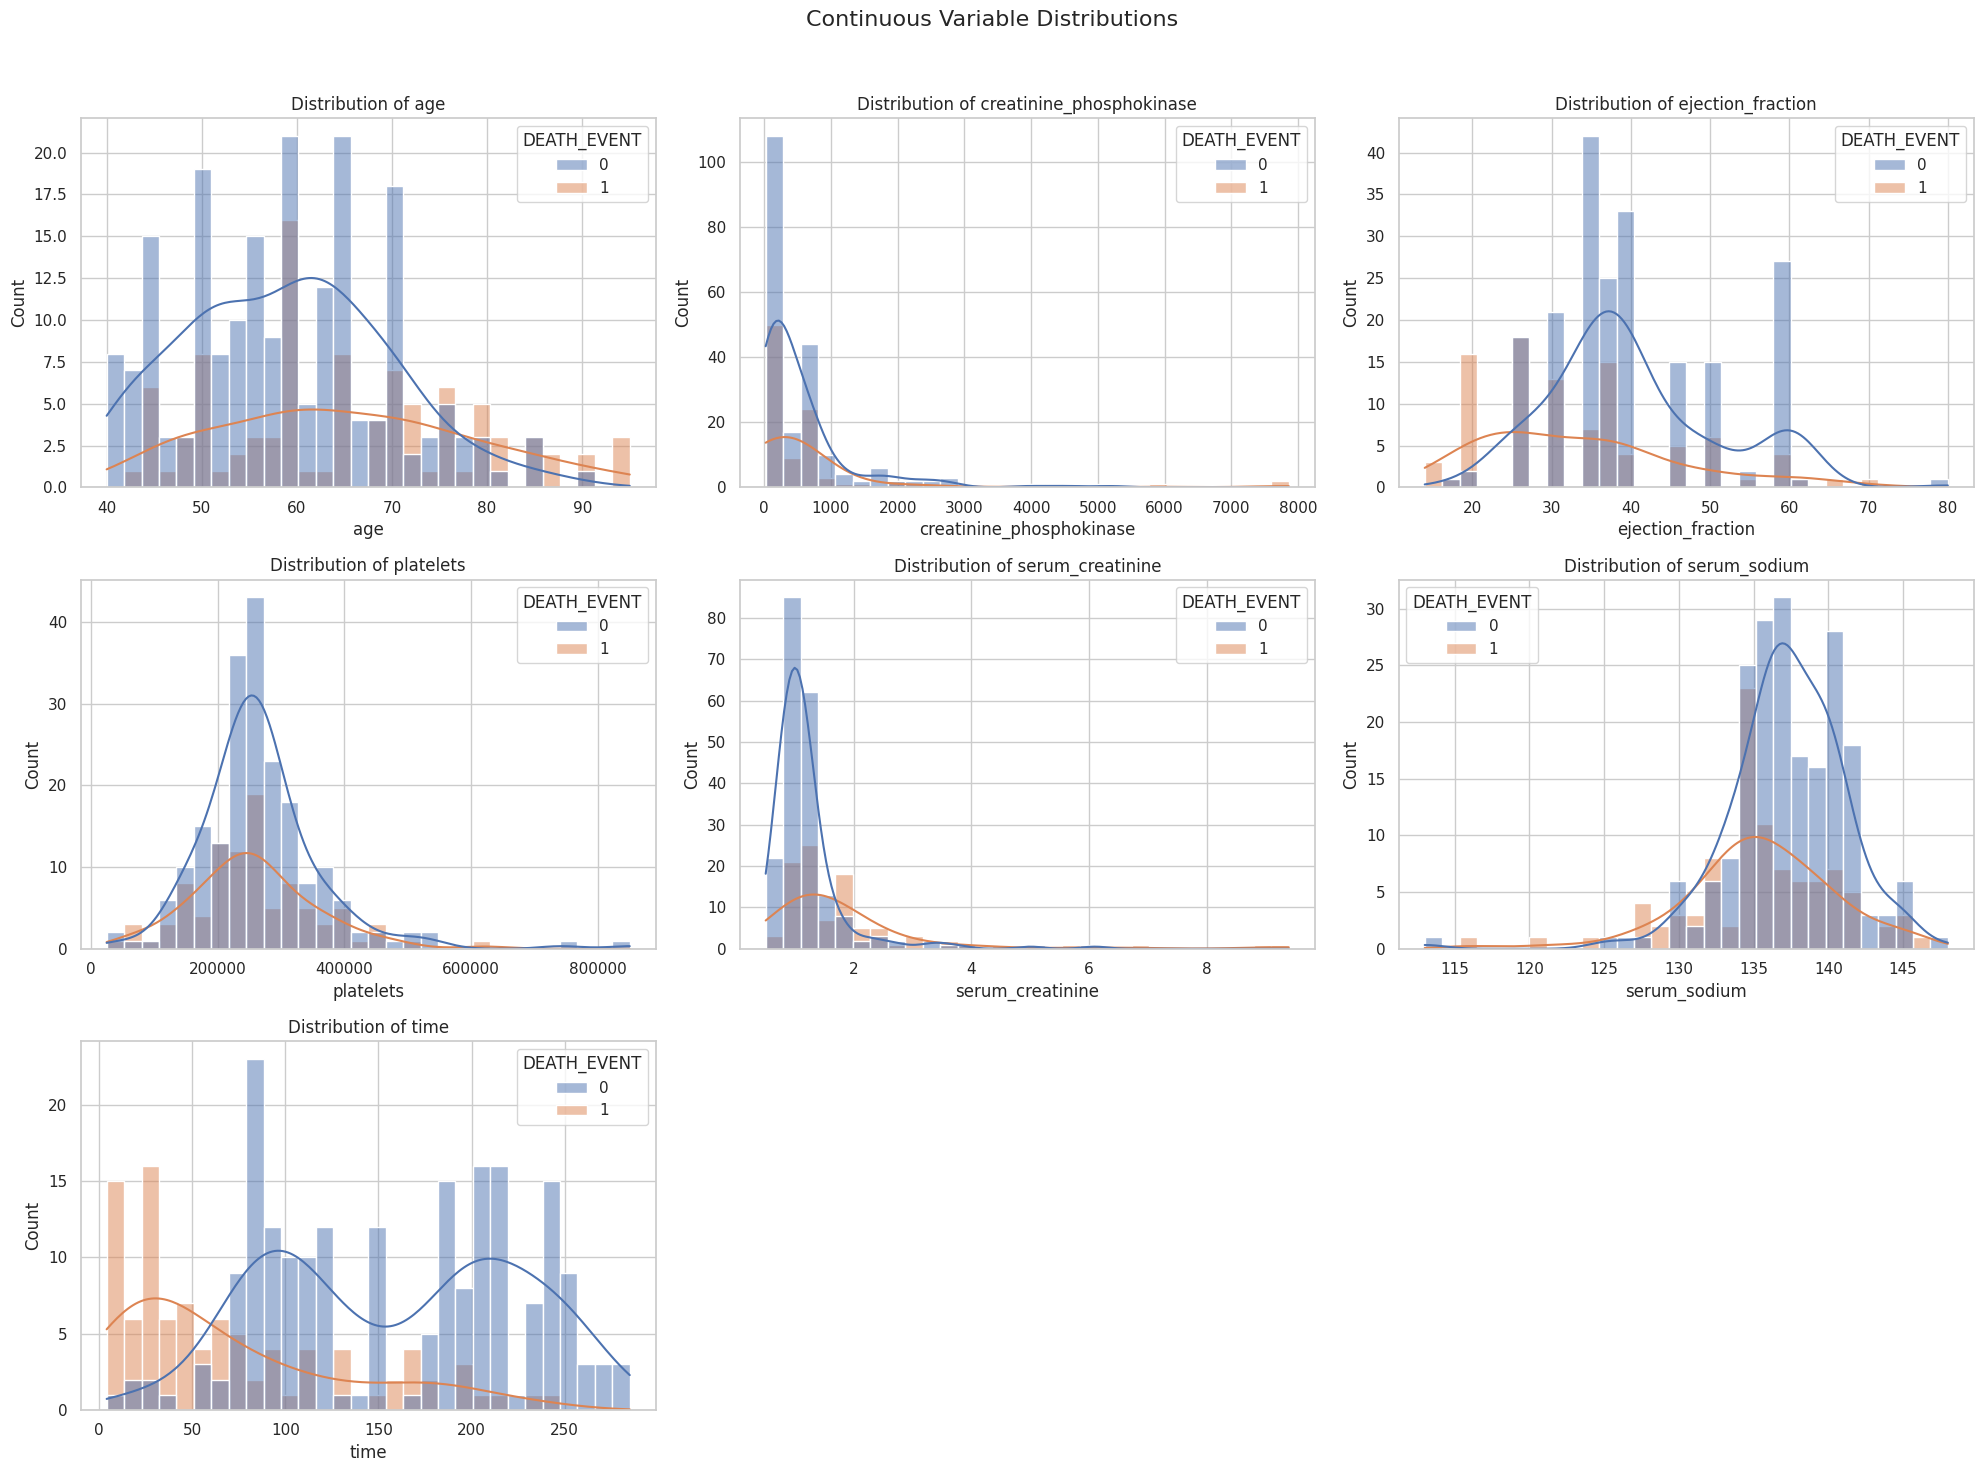

In [ ]:
# Function to plot histograms for continuous variables
def plot_continuous_distributions(data, columns, target):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data, x=col, hue=target, kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.suptitle('Continuous Variable Distributions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

# Plot continuous distributions
continuous_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plot_continuous_distributions(df, continuous_columns, 'DEATH_EVENT')

**Notation:** The dataset has some imbalance, particularly in the target variable and a few categorical variables like `high_blood_pressure` and `sex`. Continuous variables exhibit a wide range, which is typical for medical data.

### **Check correlations & trends in dataset**

Text(0.5, 1.0, 'Correlation Heatmap')

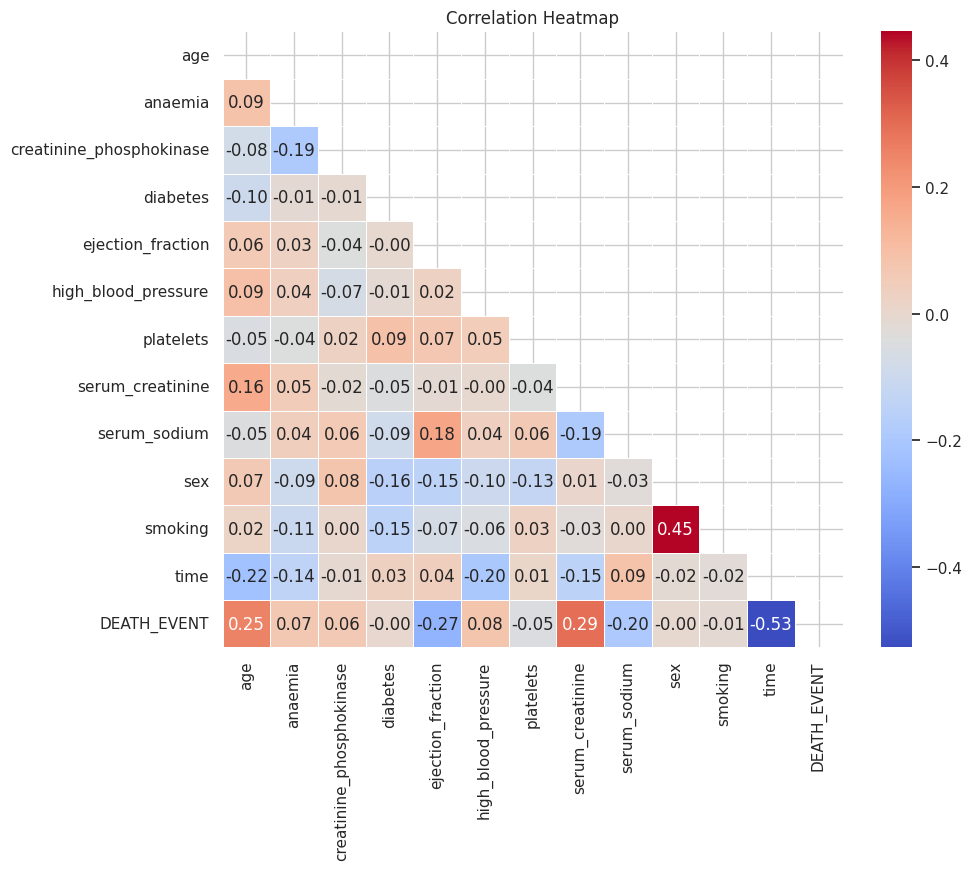

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')

Attention to DEATH_EVENT attributes as the target with others in dataset.

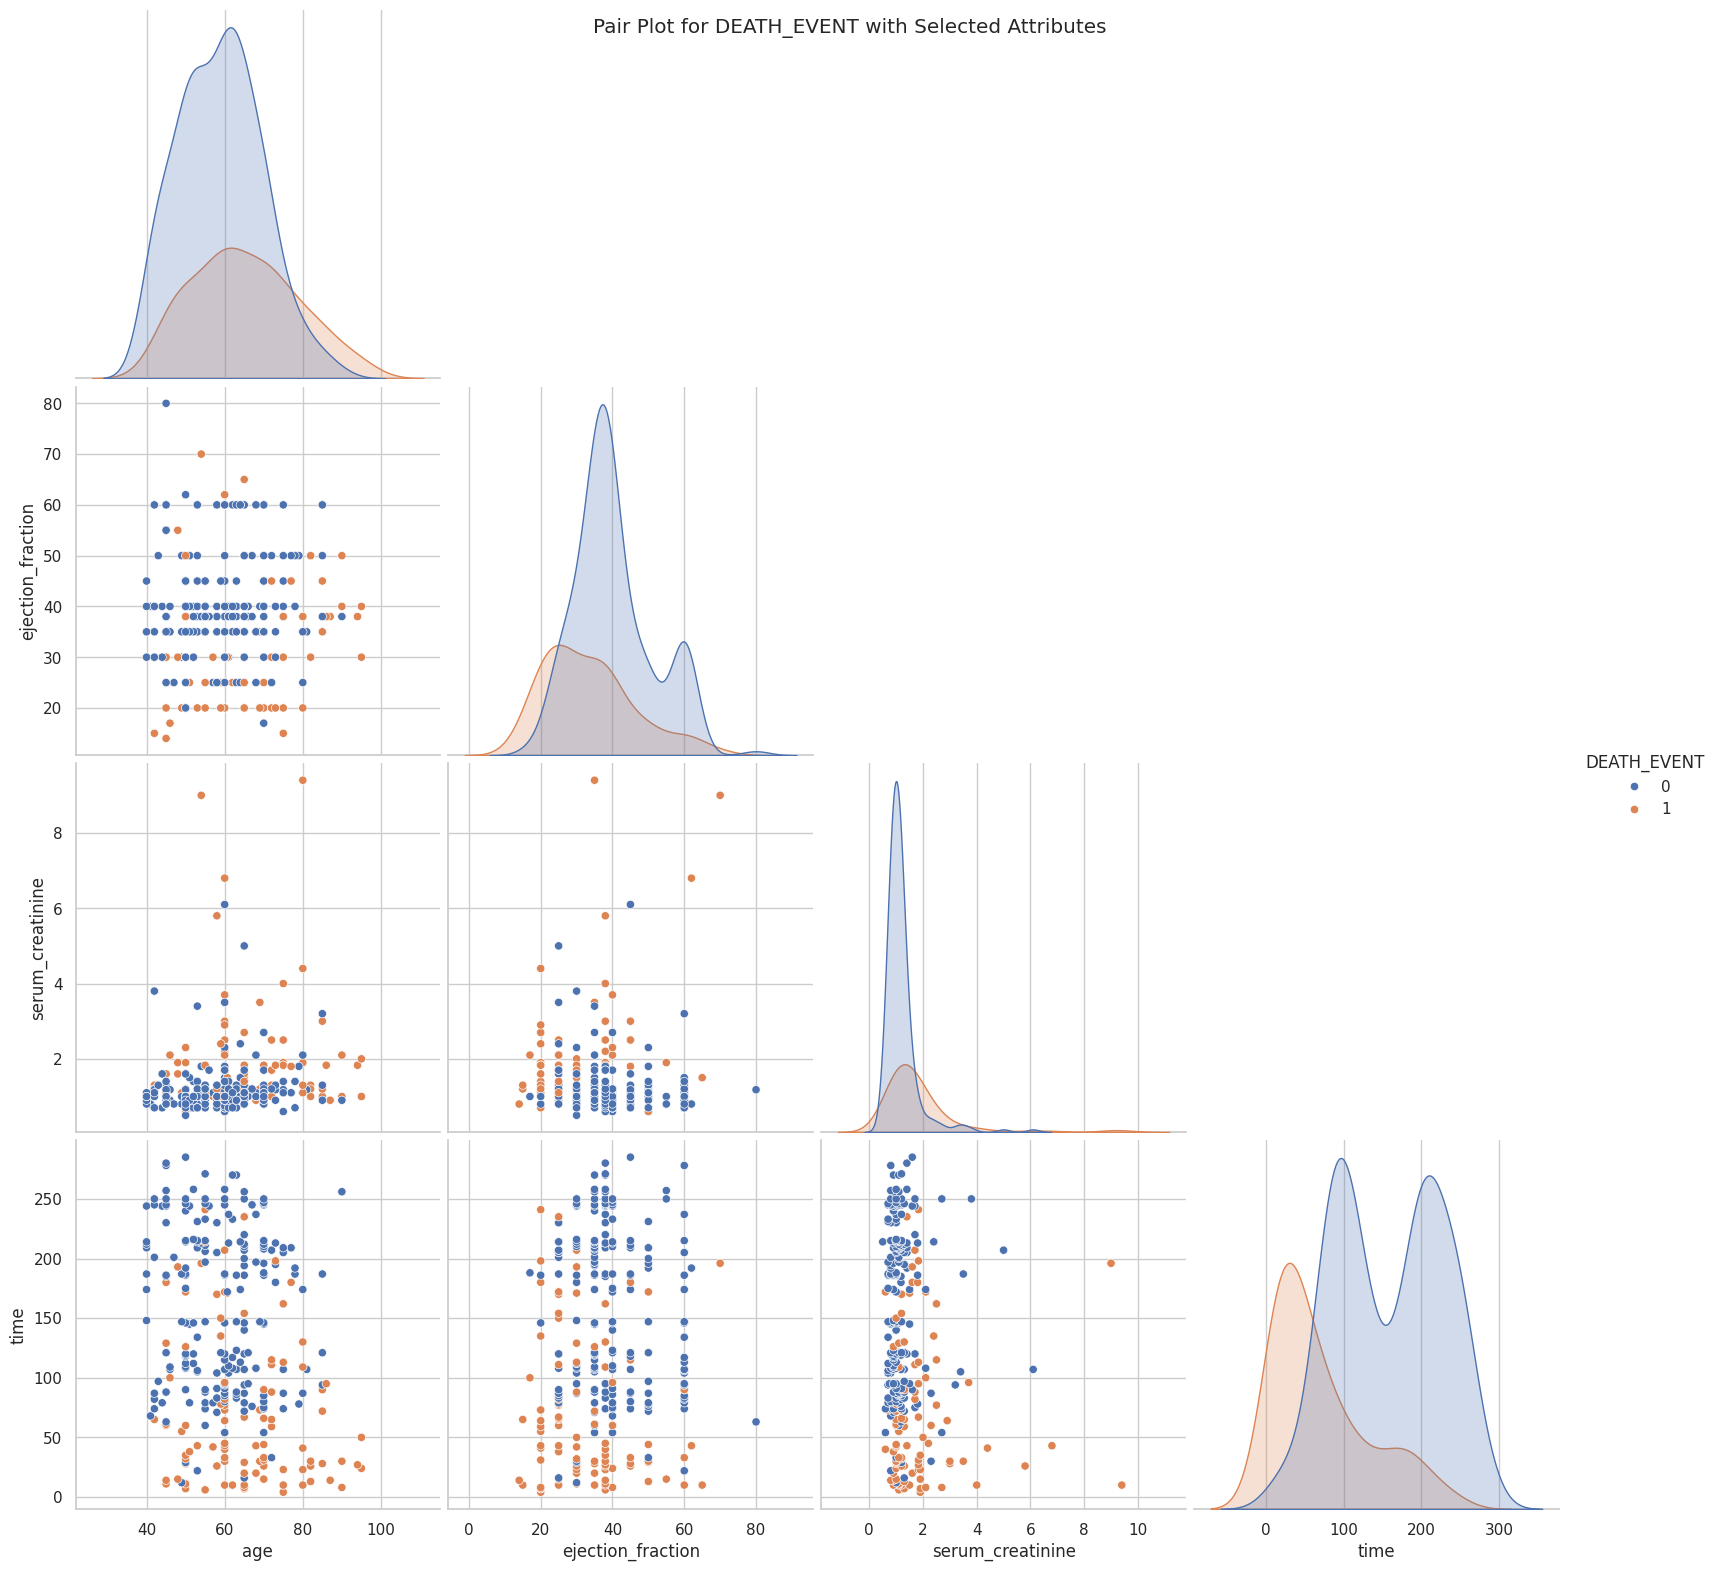

In [ ]:
# Specify the attributes you want to include
attributes = ['age', 'ejection_fraction', 'serum_creatinine', 'time']

# Create pair plot with 'DEATH_EVENT' as hue
sns.pairplot(df, vars=attributes, hue='DEATH_EVENT', diag_kind='kde', height=4, aspect = 1, corner=True)
plt.suptitle('Pair Plot for DEATH_EVENT with Selected Attributes')
plt.show()

* **Notation:** There is no significant trend in this dataset. While some attributes have valuable correlations with the target variable, these correlations are not strong enough to establish a clear trend.

## **Conclusion**  

* There are 299 non-null values in all the attributes thus no missing values and no duplicated rows.

* Datatype is also either `float64` or `int64`, all works well except age, whose datatype `float64` is not suitable for that attribute.
  
* There are many attributes containing outliers in the dataset, which are mainly related to clinical measurement, such as: `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine` and `serum_sodium`.

* Imbalance has existed in the dataset, particularly in the target variable and a few categorical variables like `high_blood_pressure` and `sex`.

* There are no trends between the target attribute and the other considerable attributes in this dataset due to low correlation.

## **Solution**

### **Handling inappropriated datatype by asType() method**

Using `.astype()` method provided by Pandas to convert the 'age' attribute's datatype to an `int64`. This ensures consistency and allows for proper numerical analysis.

In [ ]:
df['age'] = df['age'].apply(np.ceil)
df['age'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


### **Handling outliers in dataset by Robust Scaler:**


In [ ]:
# Columns to scale
columns_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                    'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Select the columns to be scaled
df_to_scale = df[columns_to_scale]

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the selected data and transform it
scaled_data = scaler.fit_transform(df_to_scale)

In [ ]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the rest of the DataFrame
df_scaled = pd.concat([df_scaled, df.drop(columns=columns_to_scale)], axis=1)
df_scaled

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.789474,0.713212,-1.200000,0.032967,1.6,-1.166667,-0.853846,0,0,1,1,0,1
1,-0.263158,16.350161,0.000000,0.014923,0.0,-0.166667,-0.838462,0,0,0,1,0,1
2,0.263158,-0.223416,-1.200000,-1.098901,0.4,-1.333333,-0.830769,0,0,0,1,1,1
3,-0.526316,-0.298604,-1.200000,-0.571429,1.6,0.000000,-0.830769,1,0,0,1,0,1
4,0.263158,-0.193340,-1.200000,0.714286,3.2,-3.500000,-0.823077,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.105263,-0.406015,0.000000,-1.175824,0.0,1.000000,1.192308,0,1,1,1,1,0
295,-0.263158,3.372718,0.000000,0.087912,0.2,0.333333,1.200000,0,0,0,0,0,0
296,-0.789474,3.888292,1.466667,5.274725,-0.6,0.166667,1.253846,0,1,0,0,0,0
297,-0.789474,4.646617,0.000000,-1.340659,0.6,0.500000,1.269231,0,0,0,1,1,0


### **Divide dataset for train and test set.**

In [ ]:
X = df_scaled.drop(['DEATH_EVENT'], axis=1)
y = df_scaled['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

### **Handling imbalance by SMOTE method:**

* **Changes in distributions after balancing SMOTE:**

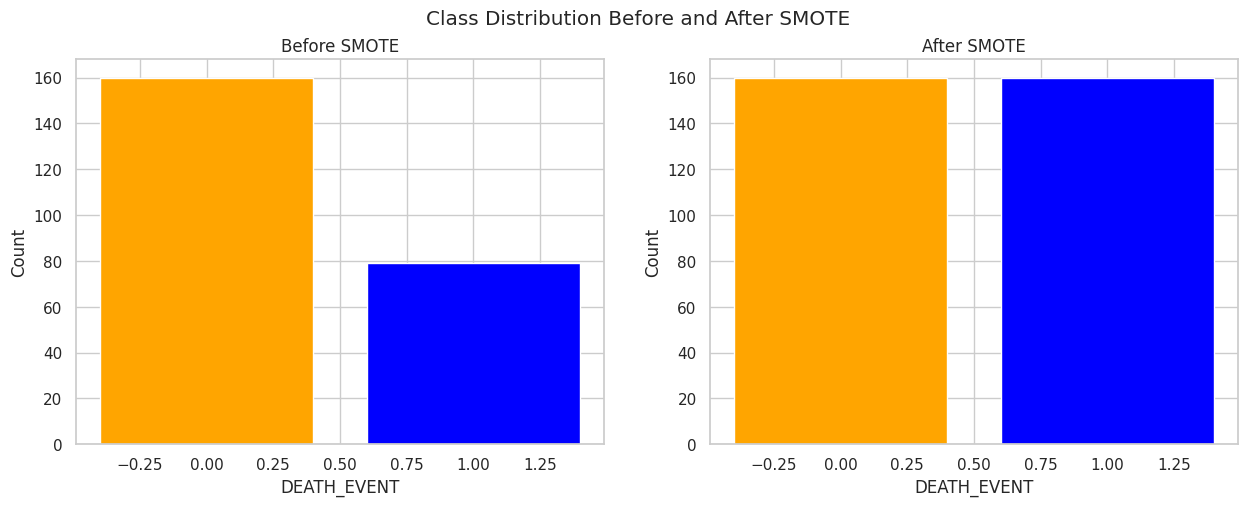

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the class distribution before SMOTE on the first subplot
before_smote = Counter(y_train)
ax1.bar(before_smote.keys(), before_smote.values(), color=['blue', 'orange'])
ax1.set_title('Before SMOTE')
ax1.set_xlabel('DEATH_EVENT')
ax1.set_ylabel('Count')

# Apply SMOTE to the data
sm = SMOTE(random_state=94)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

after_smote = Counter(y_train_smote)
ax2.bar(after_smote.keys(), after_smote.values(), color=['blue', 'orange'])
ax2.set_title('After SMOTE')
ax2.set_xlabel('DEATH_EVENT')
ax2.set_ylabel('Count')

# Add labels and title to the figure
plt.suptitle('Class Distribution Before and After SMOTE')
plt.show()

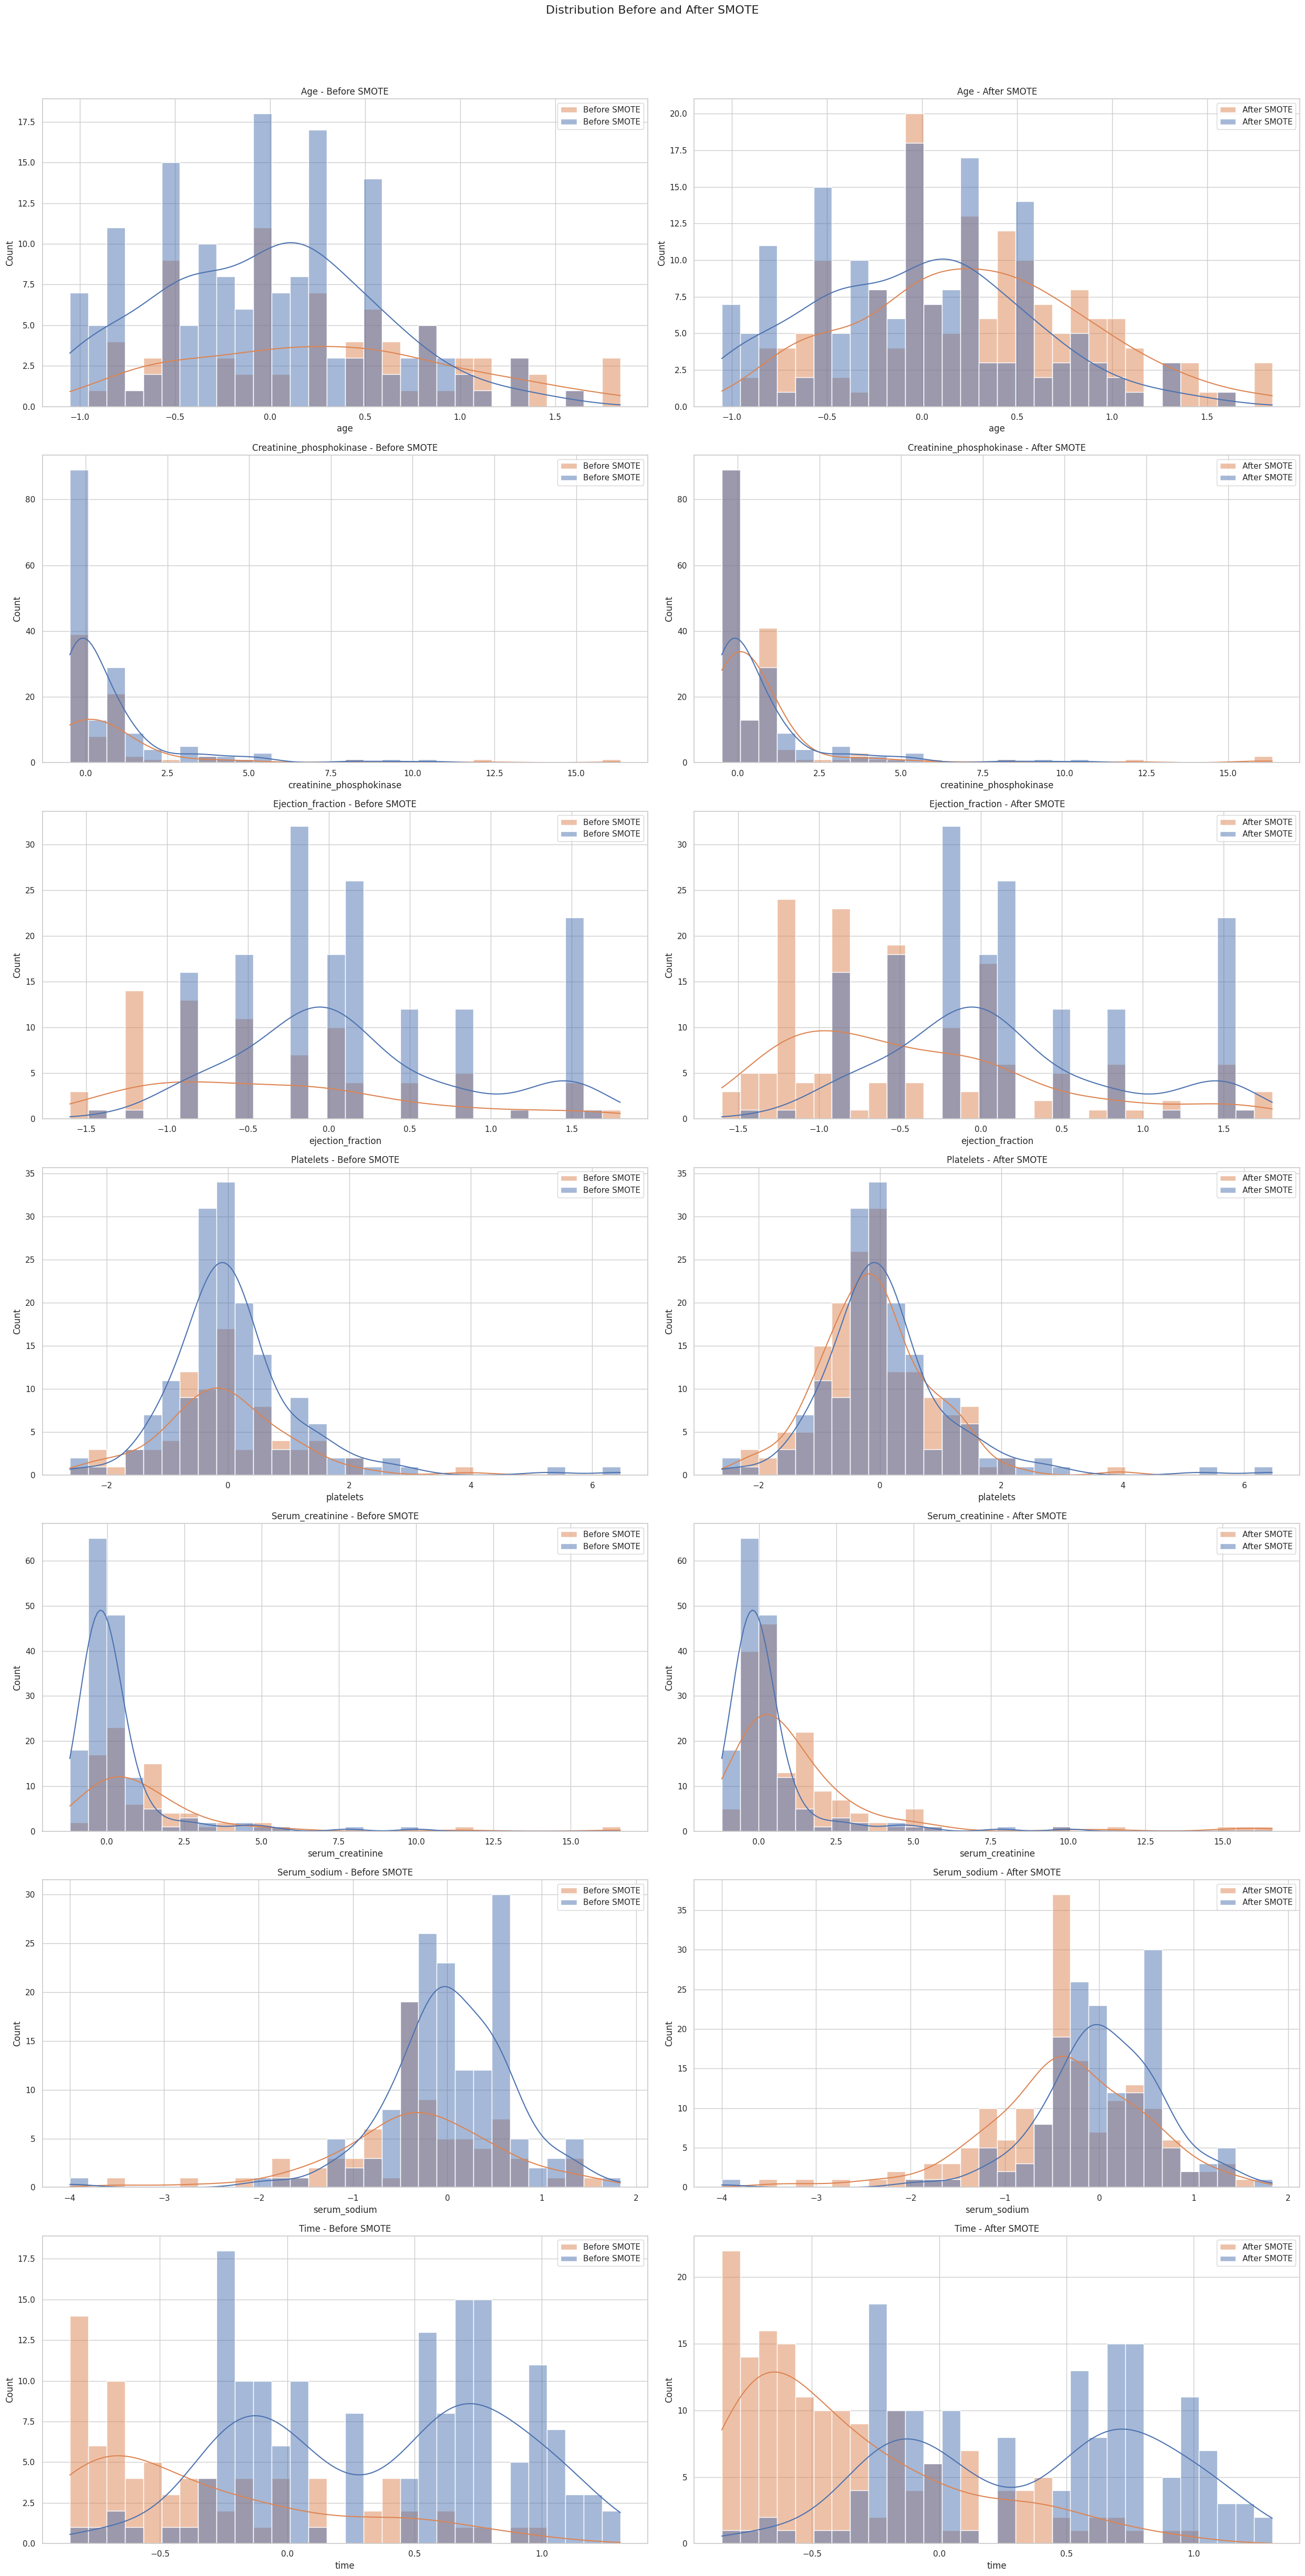

In [ ]:
# Function to plot histograms for continuous variables
train_before = pd.concat([X_train, y_train], axis=1)
train_after = pd.concat([X_train_smote, y_train_smote], axis=1)

def plot_continuous_distributions(data_before, data_after, columns, target, title):
    fig, axes = plt.subplots(len(columns), 2, figsize=(25, 50))
    for i, col in enumerate(columns):
        sns.histplot(data_before, x=col, hue=target, kde=True, bins=30, ax=axes[i, 0], alpha=0.5, label='Before SMOTE')
        sns.histplot(data_after, x=col, hue=target, kde=True, bins=30, ax=axes[i, 1], alpha=0.5, label='After SMOTE')
        axes[i, 0].set_title(f'{col.capitalize()} - Before SMOTE')
        axes[i, 1].set_title(f'{col.capitalize()} - After SMOTE')
        axes[i, 0].legend()
        axes[i, 1].legend()
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

# Plot continuous distributions
continuous_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plot_continuous_distributions(train_before, train_after, continuous_columns, 'DEATH_EVENT', 'Distribution Before and After SMOTE')

In [ ]:
X_train1 = X_train_smote[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
X_test1 = X_test[['age', 'ejection_fraction', 'serum_creatinine', 'time']]

# **Models Implementation**

## Logistic Regression

####Using all attributes

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.8333333333333334

####Using 4 attributes only



In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train1, y_train_smote)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.71      0.88      0.79        17

    accuracy                           0.87        60
   macro avg       0.83      0.87      0.85        60
weighted avg       0.88      0.87      0.87        60


ROC AUC Score:


0.8714090287277702

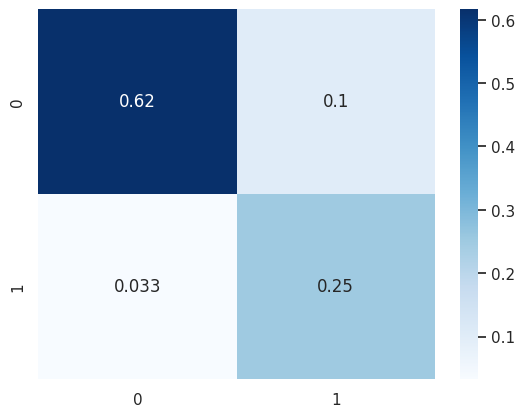

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

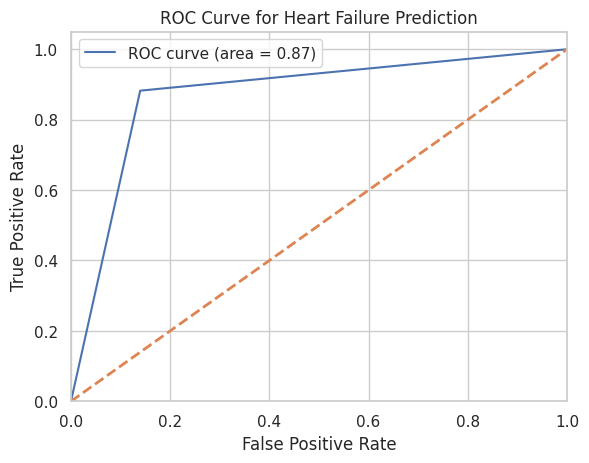

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [ ]:
def optimizing(trial):
  C = trial.suggest_float('C', 1e-5, 1e5, log=True)
  solver = trial.suggest_categorical('solver', ['liblinear', 'newton-cholesky', 'lbfgs'])

  model = LogisticRegression(C=C, solver=solver, random_state=94)

  skf = StratifiedKFold(n_splits=10)
  scores = cross_val_score(model, X_train1, y_train_smote, cv=skf, scoring='accuracy')

  return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=100)

[I 2024-07-12 13:47:06,651] A new study created in memory with name: no-name-896cf8ea-a5c2-4283-ac23-ff276f5cc748
[I 2024-07-12 13:47:06,717] Trial 0 finished with value: 0.80625 and parameters: {'C': 121.13178833616168, 'solver': 'liblinear'}. Best is trial 0 with value: 0.80625.
[I 2024-07-12 13:47:06,781] Trial 1 finished with value: 0.784375 and parameters: {'C': 0.00027726173876915837, 'solver': 'liblinear'}. Best is trial 0 with value: 0.80625.
[I 2024-07-12 13:47:06,858] Trial 2 finished with value: 0.809375 and parameters: {'C': 0.006356788516359099, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.809375.
[I 2024-07-12 13:47:06,935] Trial 3 finished with value: 0.80625 and parameters: {'C': 162.9009481837381, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.809375.
[I 2024-07-12 13:47:07,018] Trial 4 finished with value: 0.790625 and parameters: {'C': 0.004332883111196231, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.809375.
[I 2024-07-12 13:47:07,075] Trial 5 finished 

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.8281
  Params: 
    C: 0.017649006857068054
    solver: lbfgs


In [ ]:
best_params = study.best_params

best_model = LogisticRegression(**best_params)
best_model.fit(X_train1, y_train_smote)

LogisticRegression(C=0.017649006857068054)

In [ ]:
y_pred = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.79      0.88      0.83        17

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.91      0.90      0.90        60


ROC AUC Score:


0.8946648426812586

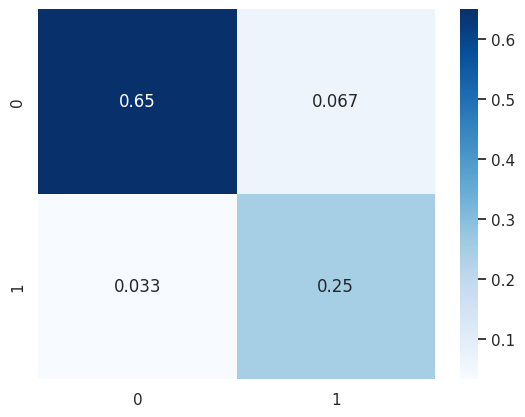

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

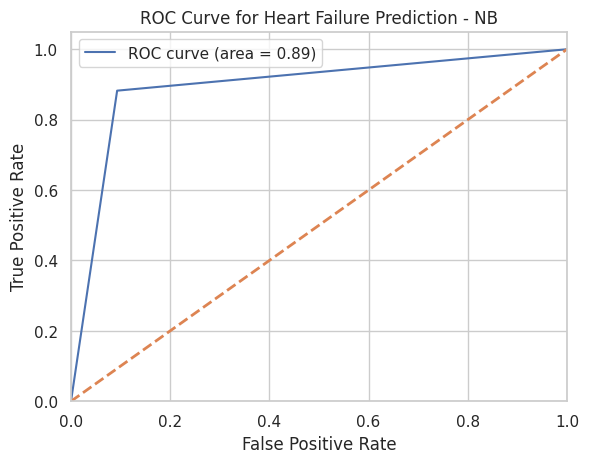

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

## K-Nearest Neighbor

####Using all attributes

In [ ]:
model = KNeighborsClassifier()

In [ ]:
model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.7333333333333333

####Using 4 attributes only



In [ ]:
model = KNeighborsClassifier()

In [ ]:
model.fit(X_train1, y_train_smote)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.65      0.88      0.75        17

    accuracy                           0.83        60
   macro avg       0.80      0.85      0.81        60
weighted avg       0.86      0.83      0.84        60


ROC AUC Score:


0.8481532147742818

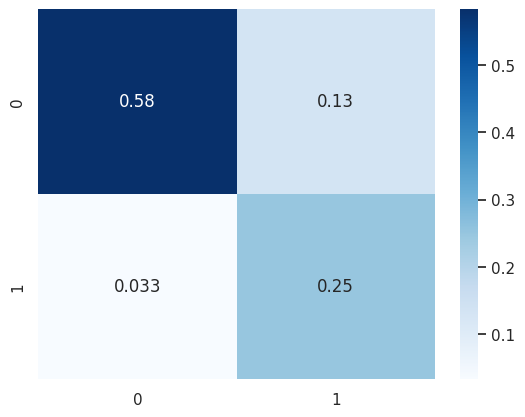

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

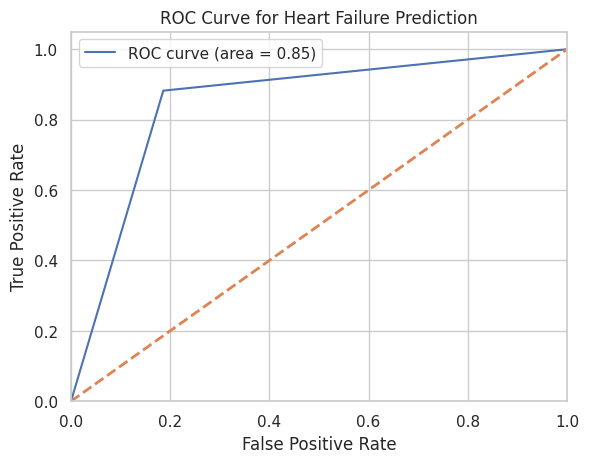

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [ ]:
def optimizing(trial):
  n_neighbors = trial.suggest_int('n_neighbors', 5, 30)
  weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
  metric = trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan'])

  model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

  skf = StratifiedKFold(n_splits=10)
  scores = cross_val_score(model, X_train1, y_train_smote, cv=skf, scoring='accuracy')

  return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=100)

[I 2024-07-12 13:47:17,452] A new study created in memory with name: no-name-b4357c87-abff-4683-9cab-f9dc27356dc9
[I 2024-07-12 13:47:17,571] Trial 0 finished with value: 0.8 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.8.
[I 2024-07-12 13:47:17,649] Trial 1 finished with value: 0.80625 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.80625.
[I 2024-07-12 13:47:17,706] Trial 2 finished with value: 0.859375 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.859375.
[I 2024-07-12 13:47:17,762] Trial 3 finished with value: 0.846875 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 2 with value: 0.859375.
[I 2024-07-12 13:47:17,831] Trial 4 finished with value: 0.853125 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'}. Best

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.8656
  Params: 
    n_neighbors: 23
    weights: distance
    metric: manhattan


In [ ]:
best_params = study.best_params

best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train1, y_train_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')

In [ ]:
y_pred = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.70      0.94      0.80        17

    accuracy                           0.87        60
   macro avg       0.83      0.89      0.85        60
weighted avg       0.89      0.87      0.87        60


ROC AUC Score:


0.8891928864569083

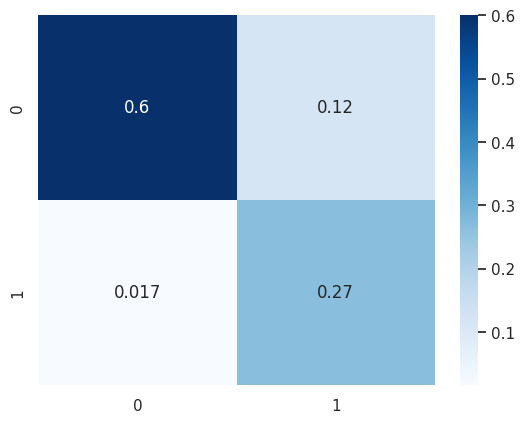

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

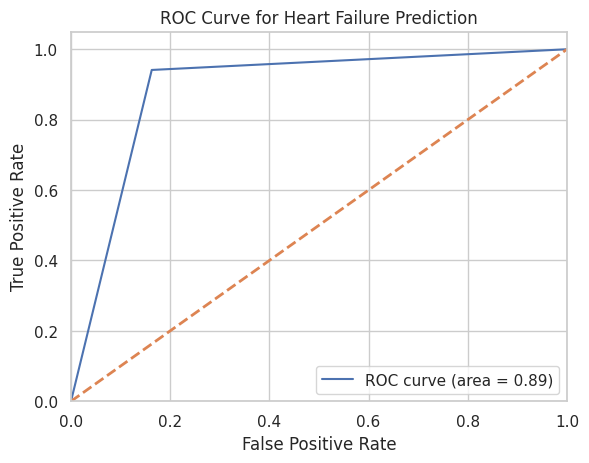

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction')
plt.legend()
plt.show()

## Naïve Bayes

####Using all attributes

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train_smote, y_train_smote)

GaussianNB()

In [ ]:
y_test

27     1
285    0
188    0
24     1
47     1
223    0
268    0
176    0
139    0
39     1
287    0
260    0
256    0
80     0
48     1
62     0
276    0
69     1
168    0
125    0
36     1
81     0
205    0
217    1
60     1
152    0
142    0
173    0
25     1
264    0
172    0
71     0
175    0
209    0
67     1
145    0
54     1
57     0
269    0
181    1
251    0
28     1
122    0
297    0
82     1
95     0
92     0
153    0
106    0
64     0
76     0
12     1
190    0
86     0
73     0
267    0
141    0
51     1
94     0
20     0
Name: DEATH_EVENT, dtype: int64

In [ ]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.9

####Using 4 attributes only



In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train1, y_train_smote)

GaussianNB()

In [ ]:
model.predict(X_test1)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_pred = model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.76      0.94      0.84        17

    accuracy                           0.90        60
   macro avg       0.87      0.91      0.88        60
weighted avg       0.91      0.90      0.90        60


ROC AUC Score:


0.9124487004103967

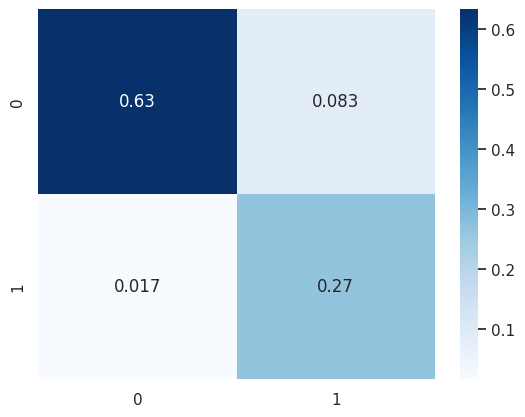

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

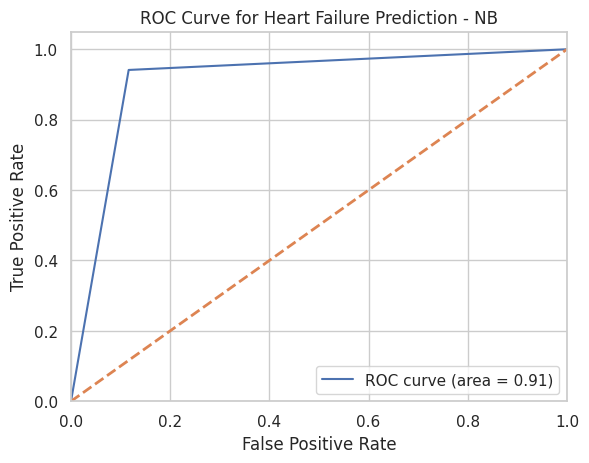

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [ ]:
def optimizing(trial):
  var_smoothing = trial.suggest_float('var_smoothing', 1e-12, 1e-6, log=True)
  model = GaussianNB(var_smoothing=var_smoothing)

  skf = StratifiedKFold(n_splits=10)
  scores = cross_val_score(model, X_train1, y_train_smote, cv=skf, scoring='accuracy')

  return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=100)

[I 2024-07-12 13:47:27,291] A new study created in memory with name: no-name-d6a3c661-56ae-47b2-a98d-ab089c421cd4
[I 2024-07-12 13:47:27,354] Trial 0 finished with value: 0.81875 and parameters: {'var_smoothing': 9.881222517886043e-11}. Best is trial 0 with value: 0.81875.
[I 2024-07-12 13:47:27,431] Trial 1 finished with value: 0.81875 and parameters: {'var_smoothing': 2.3141429359695282e-10}. Best is trial 0 with value: 0.81875.
[I 2024-07-12 13:47:27,496] Trial 2 finished with value: 0.81875 and parameters: {'var_smoothing': 4.9150241446436404e-11}. Best is trial 0 with value: 0.81875.
[I 2024-07-12 13:47:27,568] Trial 3 finished with value: 0.81875 and parameters: {'var_smoothing': 6.275942350881975e-11}. Best is trial 0 with value: 0.81875.
[I 2024-07-12 13:47:27,642] Trial 4 finished with value: 0.81875 and parameters: {'var_smoothing': 1.2732644650644328e-08}. Best is trial 0 with value: 0.81875.
[I 2024-07-12 13:47:27,693] Trial 5 finished with value: 0.81875 and parameters: {'

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.8187
  Params: 
    var_smoothing: 9.881222517886043e-11


In [ ]:
best_params = study.best_params

best_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_model.fit(X_train1, y_train_smote)

GaussianNB(var_smoothing=9.881222517886043e-11)

In [ ]:
y_pred = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.76      0.94      0.84        17

    accuracy                           0.90        60
   macro avg       0.87      0.91      0.88        60
weighted avg       0.91      0.90      0.90        60


ROC AUC Score:


0.9124487004103967

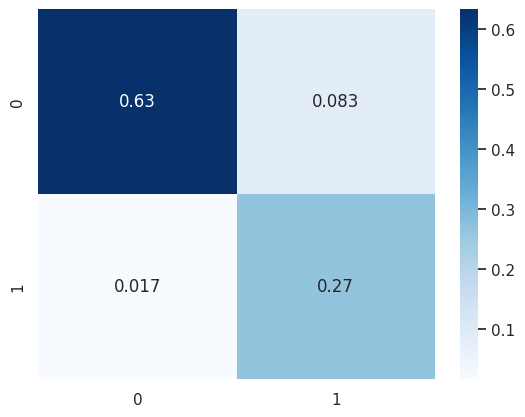

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

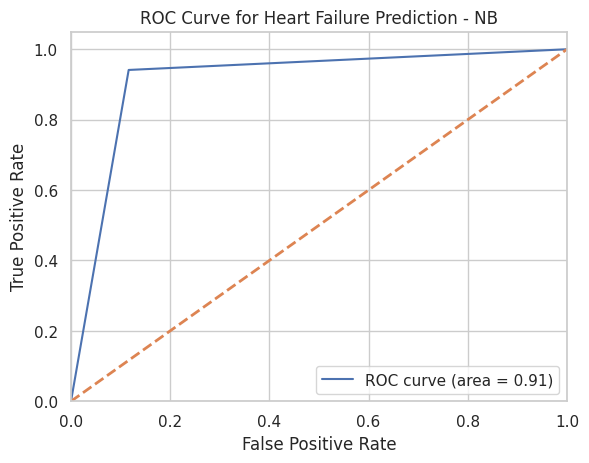

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

## SVM

####Using all attributes

In [ ]:
svc=SVC() #Default hyperparameters
display(svc)

svc.fit(X_train_smote, y_train_smote)

y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

SVC()

Accuracy Score:
0.8666666666666667


####Using 4 attributes only

In [ ]:
svc=SVC() #Default hyperparameters

svc.fit(X_train1,y_train_smote)

SVC()

In [ ]:
y_pred = svc.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm2 = confusion_matrix(y_test, y_pred)
cm2 = cm2/np.sum(cm2)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.75      0.88      0.81        17

    accuracy                           0.88        60
   macro avg       0.85      0.88      0.86        60
weighted avg       0.89      0.88      0.89        60


ROC AUC Score:


0.8830369357045144

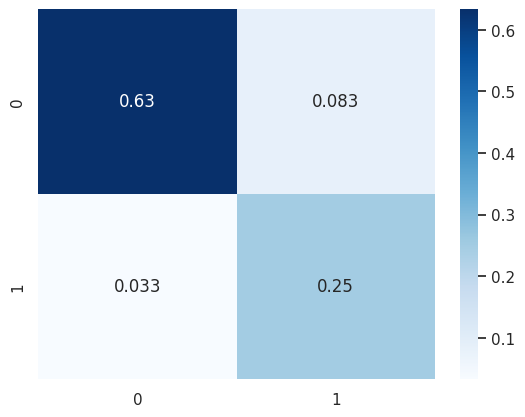

In [ ]:
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.show()

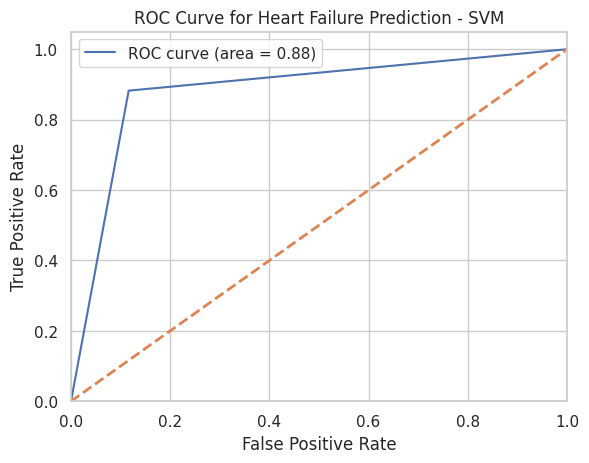

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - SVM')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [ ]:
def optimizing(trial):
  # Suggest values for the hyperparameters
  C = trial.suggest_float('C', 1e-5, 1e5, log=True)
  gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
  kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
  degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3

  model = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree)
  skf = StratifiedKFold(n_splits=10)
  scores = cross_val_score(model, X_train1, y_train_smote, cv=skf, scoring='accuracy')

  return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=100)

[I 2024-07-12 13:47:34,923] A new study created in memory with name: no-name-1dc369d1-1fdb-45cc-8f90-13844b72b4ce
[I 2024-07-12 13:47:35,035] Trial 0 finished with value: 0.721875 and parameters: {'C': 0.0015630628842448215, 'gamma': 'scale', 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.721875.
[I 2024-07-12 13:47:35,116] Trial 1 finished with value: 0.85 and parameters: {'C': 0.5878870444485443, 'gamma': 'scale', 'kernel': 'rbf'}. Best is trial 1 with value: 0.85.
[I 2024-07-12 13:47:35,205] Trial 2 finished with value: 0.5125 and parameters: {'C': 8.144201202122021e-05, 'gamma': 'scale', 'kernel': 'poly', 'degree': 4}. Best is trial 1 with value: 0.85.
[I 2024-07-12 13:47:48,097] Trial 3 finished with value: 0.6375 and parameters: {'C': 8643.217859068065, 'gamma': 'scale', 'kernel': 'poly', 'degree': 2}. Best is trial 1 with value: 0.85.
[I 2024-07-12 13:47:48,192] Trial 4 finished with value: 0.509375 and parameters: {'C': 0.00020785090888872612, 'gamma': 'scale', 'kernel': '

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.8594
  Params: 
    C: 228.7528224178757
    gamma: auto
    kernel: rbf


In [ ]:
best_params = study.best_params

best_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
best_model.fit(X_train1, y_train_smote)

SVC(C=228.7528224178757, gamma='auto')

In [ ]:
y_pred = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.71      0.59      0.65        17

    accuracy                           0.82        60
   macro avg       0.78      0.75      0.76        60
weighted avg       0.81      0.82      0.81        60


ROC AUC Score:


0.747606019151847

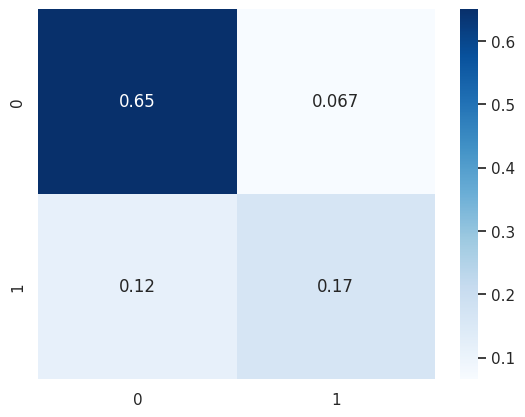

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

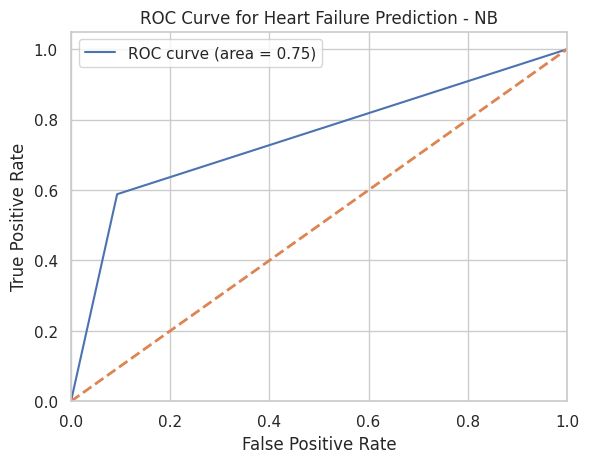

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

## CatBoost

####Using all attributes

In [ ]:
model=CatBoostClassifier()

model.fit(X_train_smote, y_train_smote)

Learning rate set to 0.006333
0:	learn: 0.6875459	total: 49ms	remaining: 48.9s
1:	learn: 0.6823850	total: 51ms	remaining: 25.4s
2:	learn: 0.6772703	total: 52.9ms	remaining: 17.6s
3:	learn: 0.6722210	total: 54.8ms	remaining: 13.6s
4:	learn: 0.6675667	total: 56.8ms	remaining: 11.3s
5:	learn: 0.6619140	total: 58.8ms	remaining: 9.74s
6:	learn: 0.6567595	total: 60.6ms	remaining: 8.6s
7:	learn: 0.6517242	total: 62.4ms	remaining: 7.74s
8:	learn: 0.6460135	total: 64.3ms	remaining: 7.08s
9:	learn: 0.6410509	total: 66.3ms	remaining: 6.56s
10:	learn: 0.6359534	total: 68.2ms	remaining: 6.13s
11:	learn: 0.6319067	total: 70ms	remaining: 5.76s
12:	learn: 0.6276292	total: 72ms	remaining: 5.46s
13:	learn: 0.6234886	total: 73.8ms	remaining: 5.19s
14:	learn: 0.6191434	total: 75.7ms	remaining: 4.97s
15:	learn: 0.6146256	total: 77.5ms	remaining: 4.77s
16:	learn: 0.6099294	total: 79.3ms	remaining: 4.59s
17:	learn: 0.6054396	total: 81.1ms	remaining: 4.43s
18:	learn: 0.6007097	total: 82.9ms	remaining: 4.28s
1

In [ ]:
y_pred=model.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.85


####Using 4 attributes only

In [ ]:
model=CatBoostClassifier()
model.fit(X_train1,y_train_smote)

Learning rate set to 0.006333
0:	learn: 0.6881860	total: 1.57ms	remaining: 1.57s
1:	learn: 0.6819731	total: 2.97ms	remaining: 1.48s
2:	learn: 0.6772408	total: 4.36ms	remaining: 1.45s
3:	learn: 0.6719522	total: 5.72ms	remaining: 1.42s
4:	learn: 0.6668152	total: 7.08ms	remaining: 1.41s
5:	learn: 0.6625255	total: 8.36ms	remaining: 1.38s
6:	learn: 0.6577755	total: 9.67ms	remaining: 1.37s
7:	learn: 0.6533408	total: 10.8ms	remaining: 1.34s
8:	learn: 0.6483872	total: 12ms	remaining: 1.32s
9:	learn: 0.6421668	total: 13.2ms	remaining: 1.3s
10:	learn: 0.6371986	total: 14.4ms	remaining: 1.29s
11:	learn: 0.6322618	total: 16.2ms	remaining: 1.33s
12:	learn: 0.6281625	total: 17.3ms	remaining: 1.31s
13:	learn: 0.6235960	total: 18.3ms	remaining: 1.28s
14:	learn: 0.6187069	total: 19.6ms	remaining: 1.28s
15:	learn: 0.6143670	total: 20.7ms	remaining: 1.27s
16:	learn: 0.6100631	total: 22ms	remaining: 1.27s
17:	learn: 0.6063214	total: 23.3ms	remaining: 1.27s
18:	learn: 0.6011913	total: 24.8ms	remaining: 1.2

In [ ]:
y_pred = model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm2 = confusion_matrix(y_test, y_pred)
cm2 = cm2/np.sum(cm2)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.70      0.94      0.80        17

    accuracy                           0.87        60
   macro avg       0.83      0.89      0.85        60
weighted avg       0.89      0.87      0.87        60


ROC AUC Score:


0.8891928864569083

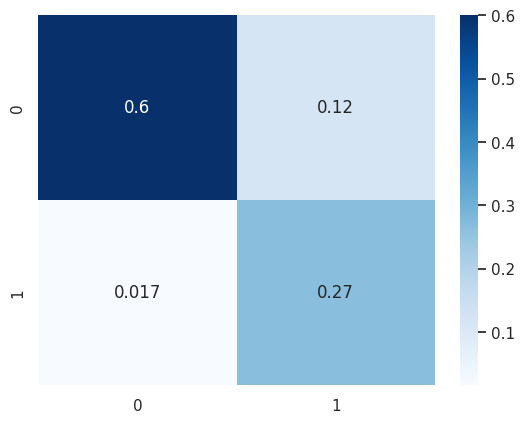

In [ ]:
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.show()

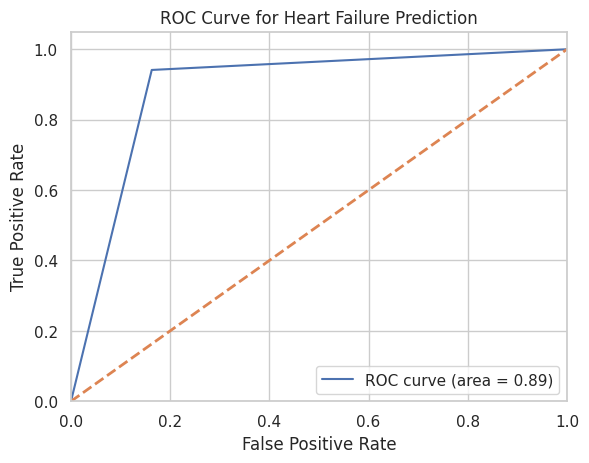

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [ ]:
def optimizing(trial):
  learning_rate = trial.suggest_float('learning_rate', 1e-5, 0.1, log=True)
  subsample = trial.suggest_float("subsample", 0.05, 1.0)
  min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 1, 100)
  depth = trial.suggest_int('depth', 1, 10)

  model = CatBoostClassifier(learning_rate=learning_rate, subsample=subsample, min_data_in_leaf=min_data_in_leaf, depth=depth, verbose=0)
  skf = StratifiedKFold(n_splits=10)
  scores = cross_val_score(model, X_train1, y_train_smote, cv=skf, scoring='accuracy')

  return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=50)

[I 2024-07-12 13:50:40,282] A new study created in memory with name: no-name-46eb348a-7ff2-4bff-92e2-85edd76ec88b
[I 2024-07-12 13:50:49,366] Trial 0 finished with value: 0.853125 and parameters: {'learning_rate': 0.0017255253409417162, 'subsample': 0.09676894966701037, 'min_data_in_leaf': 50, 'depth': 4}. Best is trial 0 with value: 0.853125.
[I 2024-07-12 13:52:16,727] Trial 1 finished with value: 0.875 and parameters: {'learning_rate': 0.022064401352733763, 'subsample': 0.9383463974899178, 'min_data_in_leaf': 35, 'depth': 10}. Best is trial 1 with value: 0.875.
[I 2024-07-12 13:53:02,385] Trial 2 finished with value: 0.890625 and parameters: {'learning_rate': 0.013052856119221379, 'subsample': 0.550627311578115, 'min_data_in_leaf': 95, 'depth': 9}. Best is trial 2 with value: 0.890625.
[I 2024-07-12 13:53:08,620] Trial 3 finished with value: 0.809375 and parameters: {'learning_rate': 2.333205625742998e-05, 'subsample': 0.523493439916803, 'min_data_in_leaf': 81, 'depth': 3}. Best is 

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9031
  Params: 
    learning_rate: 0.019916926614281433
    subsample: 0.35984016532334534
    min_data_in_leaf: 80
    depth: 7


In [ ]:
best_params = study.best_params

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train1, y_train_smote)

0:	learn: 0.6787513	total: 1.77ms	remaining: 1.77s
1:	learn: 0.6639626	total: 3.65ms	remaining: 1.82s
2:	learn: 0.6509846	total: 5.55ms	remaining: 1.84s
3:	learn: 0.6348183	total: 7.41ms	remaining: 1.84s
4:	learn: 0.6193833	total: 9.26ms	remaining: 1.84s
5:	learn: 0.6049842	total: 11.1ms	remaining: 1.84s
6:	learn: 0.5912765	total: 12.9ms	remaining: 1.83s
7:	learn: 0.5789532	total: 14.6ms	remaining: 1.81s
8:	learn: 0.5658351	total: 16.3ms	remaining: 1.79s
9:	learn: 0.5529243	total: 18.2ms	remaining: 1.8s
10:	learn: 0.5425038	total: 19.9ms	remaining: 1.79s
11:	learn: 0.5326108	total: 21.7ms	remaining: 1.79s
12:	learn: 0.5211906	total: 23.4ms	remaining: 1.77s
13:	learn: 0.5109527	total: 25.3ms	remaining: 1.78s
14:	learn: 0.4999743	total: 26.9ms	remaining: 1.77s
15:	learn: 0.4913427	total: 28.6ms	remaining: 1.76s
16:	learn: 0.4846021	total: 29.5ms	remaining: 1.71s
17:	learn: 0.4789207	total: 31ms	remaining: 1.69s
18:	learn: 0.4716338	total: 32.7ms	remaining: 1.69s
19:	learn: 0.4648092	tota

In [ ]:
y_pred = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.68      0.88      0.77        17

    accuracy                           0.85        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.87      0.85      0.85        60


ROC AUC Score:


0.8597811217510258

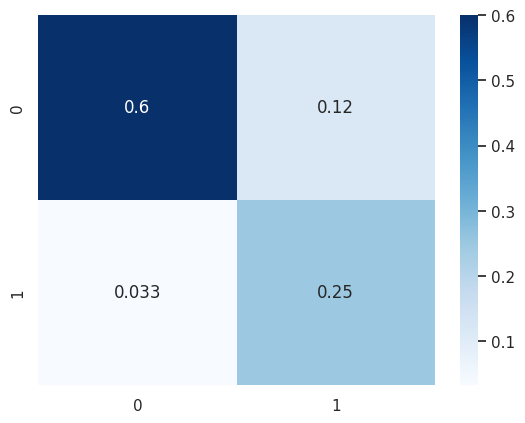

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

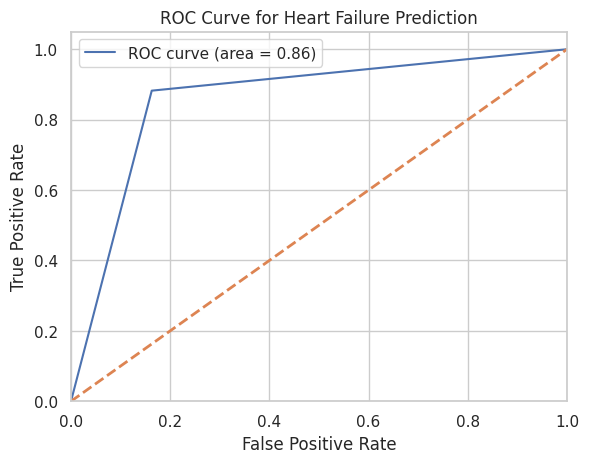

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction')
plt.legend()
plt.show()

## ANN

#### Using all attributes

In [ ]:
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True, monitor="accuracy")
history = model.fit(X_train_smote, y_train_smote, batch_size = 25, epochs = 500,callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.6000
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.6938
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.7219
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.7219
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6969
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7531
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

accuracy_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 6ms/step


0.8

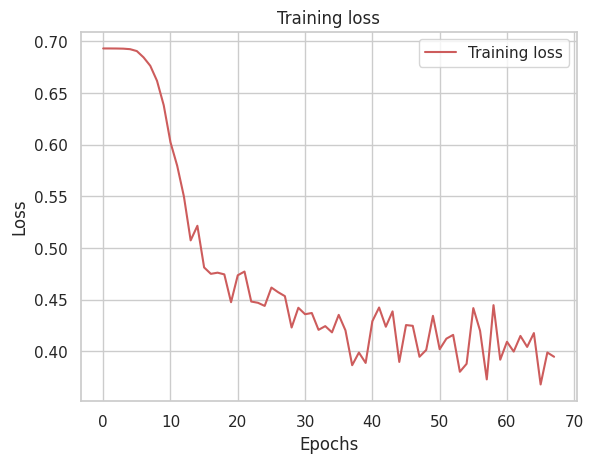

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

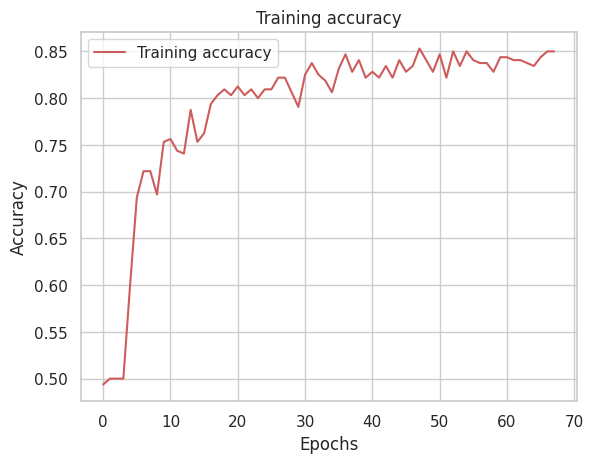

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Use 4 attributes only

In [ ]:
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train1, y_train_smote, batch_size = 25, epochs = 500,callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5094
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5844
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.6906
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.6875
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.7219
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.6938
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.7375
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7812
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7719
Epoch 11/

In [ ]:
y_pred = model.predict(X_test1)
y_pred_binary = np.round(y_pred).astype(int)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_binary))

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.70      0.82      0.76        17

    accuracy                           0.85        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.86      0.85      0.85        60


ROC AUC Score:


0.8419972640218878

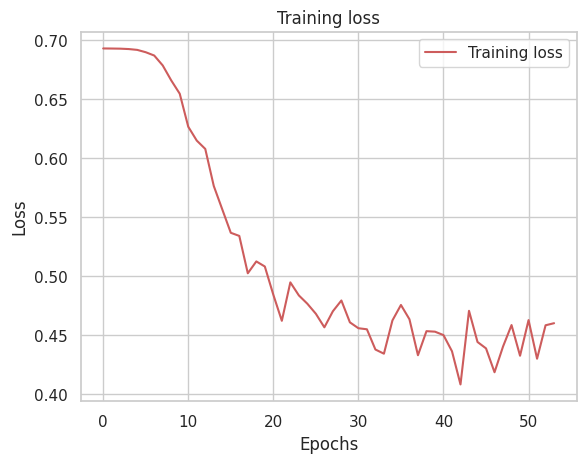

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

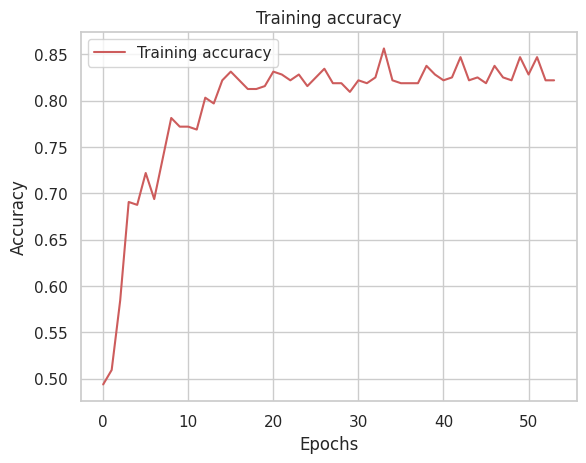

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

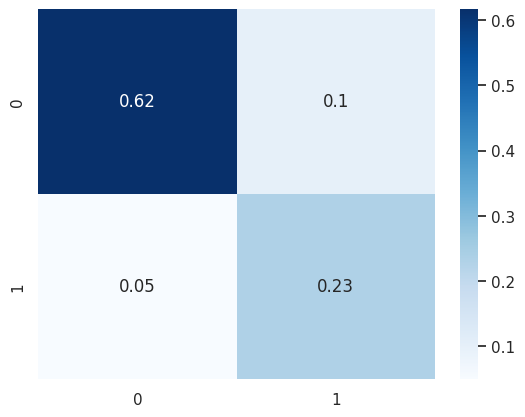

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues')
plt.show()

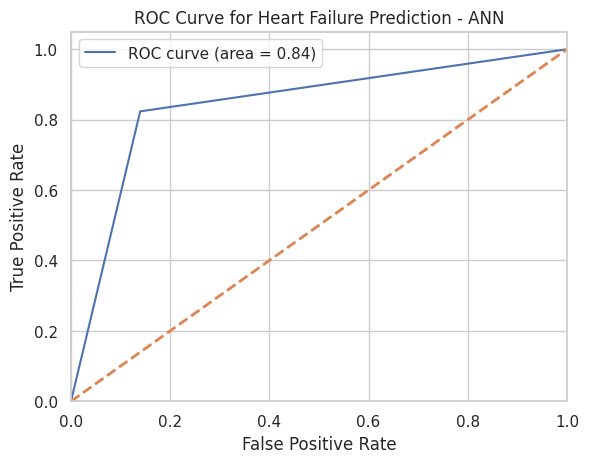

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - ANN')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [ ]:
def create_model(learning_rate, dropout_1st, dropout_2nd):
    model = Sequential()
    model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=4))
    model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_1st))
    model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_2nd))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=94)

def optimizing(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_int("batch_size", 10, 50)
    dropout_1st = trial.suggest_float("dropout_1st", 0.2, 0.5)
    dropout_2nd = trial.suggest_float("dropout_2nd", 0.5, 0.8)

    model = create_model(learning_rate, dropout_1st, dropout_2nd)

    cv_scores = []
    for train_index, val_index in skf.split(X_train1, y_train_smote):
        X_train_fold, X_val_fold = X_train1.to_numpy()[train_index], X_train1.to_numpy()[val_index]
        y_train_fold, y_val_fold = y_train_smote.to_numpy()[train_index], y_train_smote.to_numpy()[val_index]

        early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)

        history = model.fit(X_train_fold, y_train_fold, epochs=200, batch_size=batch_size,
                            validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)

        val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        cv_scores.append(val_acc)

    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=50)

[I 2024-07-12 14:05:38,757] A new study created in memory with name: no-name-4490f8a9-5703-448e-a29b-846ee04498d2
[I 2024-07-12 14:06:37,987] Trial 0 finished with value: 0.83125 and parameters: {'learning_rate': 7.054196170358187e-05, 'batch_size': 21, 'dropout_1st': 0.42035035399279075, 'dropout_2nd': 0.6353930086426999}. Best is trial 0 with value: 0.83125.
[I 2024-07-12 14:06:52,331] Trial 1 finished with value: 0.853125 and parameters: {'learning_rate': 0.0007094167062805395, 'batch_size': 43, 'dropout_1st': 0.30030247555631623, 'dropout_2nd': 0.530710048544839}. Best is trial 1 with value: 0.853125.
[I 2024-07-12 14:07:47,722] Trial 2 finished with value: 0.80625 and parameters: {'learning_rate': 8.35869485280652e-05, 'batch_size': 44, 'dropout_1st': 0.22043323467447187, 'dropout_2nd': 0.7131860591006514}. Best is trial 1 with value: 0.853125.
[I 2024-07-12 14:07:58,457] Trial 3 finished with value: 0.865625 and parameters: {'learning_rate': 0.009772239805437009, 'batch_size': 23

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9031
  Params: 
    learning_rate: 0.0023331380939379492
    batch_size: 14
    dropout_1st: 0.36232283704642854
    dropout_2nd: 0.738067298401097


In [ ]:
best_params = study.best_params

model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(best_params['dropout_1st']))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(best_params['dropout_2nd']))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train1, y_train_smote, batch_size = best_params['batch_size'], epochs = 200, callbacks=[early_stop])

Epoch 1/200
23/23 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4969
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4844
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5188
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5656
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5781
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.6562
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6875
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.6719
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7312
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7344
Epoch 11/

In [ ]:
y_pred = model.predict(X_test1)
y_pred_binary = np.round(y_pred).astype(int)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_binary))

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.68      0.88      0.77        17

    accuracy                           0.85        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.87      0.85      0.85        60


ROC AUC Score:


0.8597811217510258

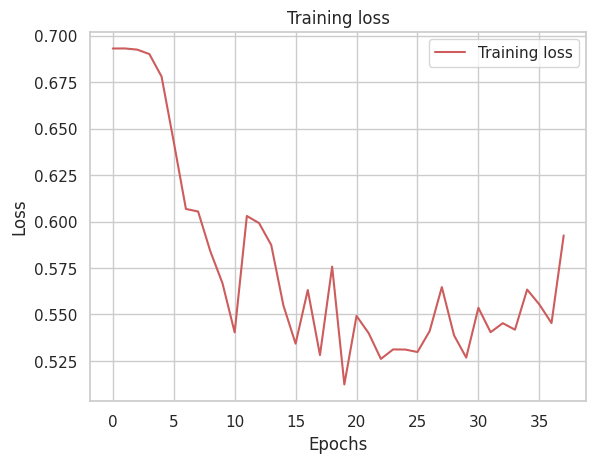

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

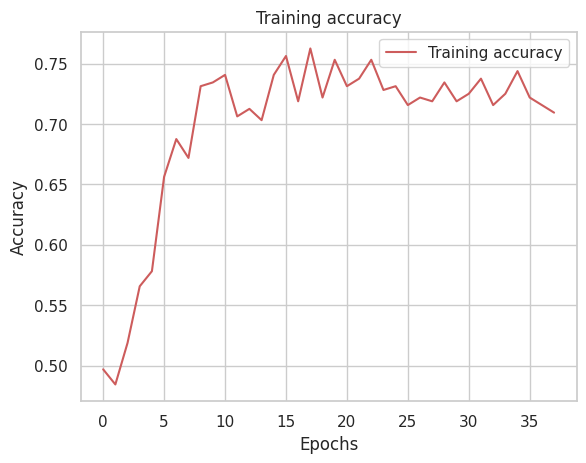

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

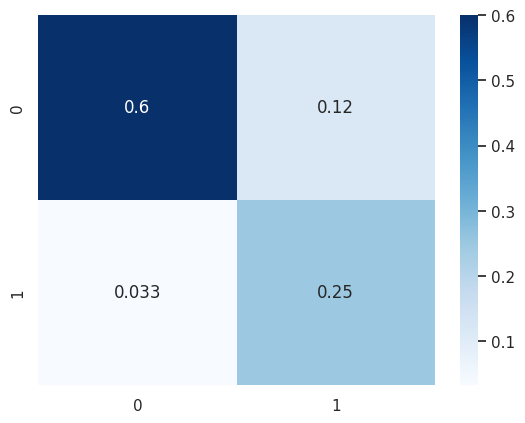

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues')
plt.show()

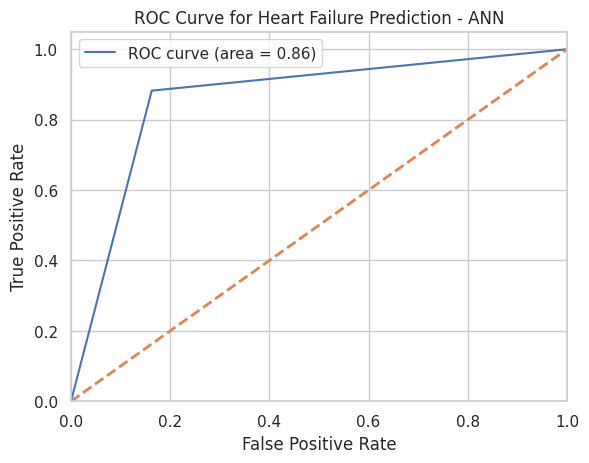

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - ANN')
plt.legend()
plt.show()

## Decision Tree Classifier

### Use all attributes

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.8

### Use 4 attributes

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train1, y_train_smote)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
print(roc_auc_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.67      0.94      0.78        17

    accuracy                           0.85        60
   macro avg       0.82      0.88      0.83        60
weighted avg       0.89      0.85      0.86        60


ROC AUC Score:
0.8775649794801642


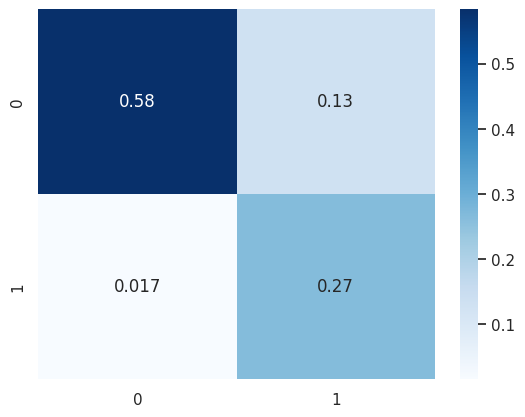

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

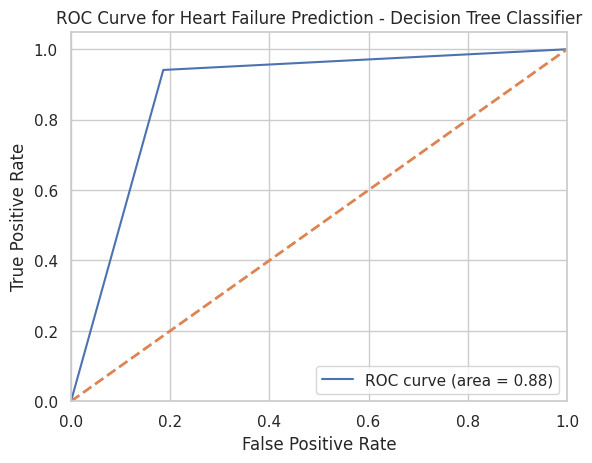

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - Decision Tree Classifier')
plt.legend()
plt.show()

### Hyperparameter Tuning

In [ ]:
def objective(trial, data):
  X, y = data
  param_grid = {
      'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
      'max_depth': trial.suggest_int('max_depth', 3, 15),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
  }

  model = DecisionTreeClassifier(**param_grid, random_state=94)
  cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
  return np.mean(cv_scores)

data = (X_train1, y_train_smote)
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, data), n_trials=50)

print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

best_model = DecisionTreeClassifier(**study.best_params, random_state=94)
best_model.fit(X_train1, y_train_smote)

[I 2024-07-12 14:26:44,856] A new study created in memory with name: no-name-6b936008-c9d3-485b-a0a7-5a9394056b66
[I 2024-07-12 14:26:44,954] Trial 0 finished with value: 0.840625 and parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.840625.
[I 2024-07-12 14:26:44,999] Trial 1 finished with value: 0.83125 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.840625.
[I 2024-07-12 14:26:45,040] Trial 2 finished with value: 0.803125 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.840625.
[I 2024-07-12 14:26:45,081] Trial 3 finished with value: 0.815625 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.840625.
[I 2024-07-12 14:26:45,123] Trial 4 finished with value

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1}
Best accuracy:  0.859375


DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=3,
                       random_state=94)

In [ ]:
y_pred_best = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
cm_best = cm_best/np.sum(cm_best)

print('\nROC AUC Score:')
print(roc_auc_score(y_test, y_pred_best))



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82        43
           1       0.57      0.76      0.65        17

    accuracy                           0.77        60
   macro avg       0.73      0.77      0.74        60
weighted avg       0.80      0.77      0.78        60


ROC AUC Score:
0.7660738714090288


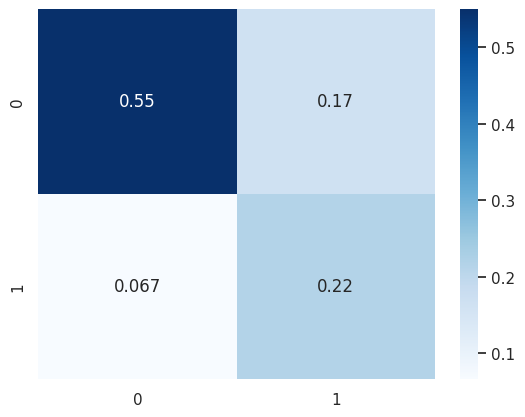

In [ ]:
sns.heatmap(cm_best, annot=True, cmap='Blues')
plt.show()

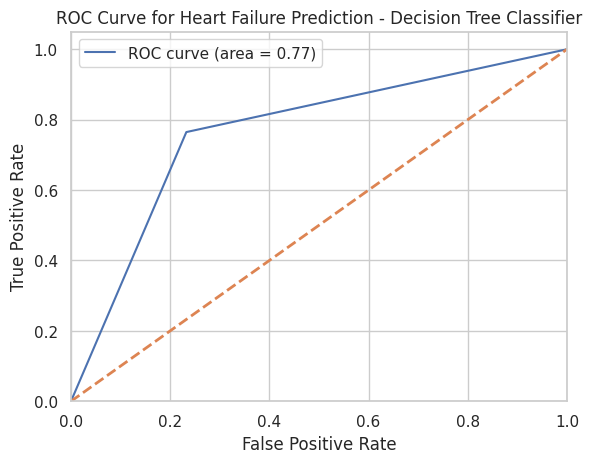

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - Decision Tree Classifier')
plt.legend()
plt.show()

## Random Forest Classifier

### Use all attributes

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.85

### Use 4 attributes

In [ ]:
model = RandomForestClassifier()
model.fit(X_train1, y_train_smote)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
print(roc_auc_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.68      0.88      0.77        17

    accuracy                           0.85        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.87      0.85      0.85        60


ROC AUC Score:
0.8597811217510258


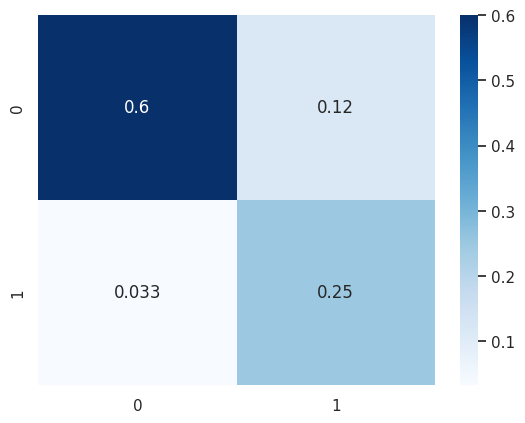

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

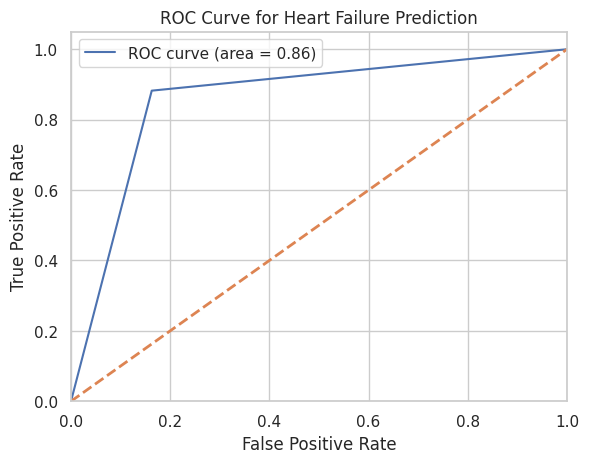

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction')
plt.legend()
plt.show()

### Hyperparameter Tuning

[I 2024-07-12 14:09:53,496] A new study created in memory with name: no-name-e5f092dc-d3d9-4c45-b032-0b908d47eec3
[I 2024-07-12 14:09:54,968] Trial 0 finished with value: 0.884375 and parameters: {'n_estimators': 219, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.884375.
[I 2024-07-12 14:09:57,897] Trial 1 finished with value: 0.859375 and parameters: {'n_estimators': 392, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.884375.
[I 2024-07-12 14:10:00,410] Trial 2 finished with value: 0.85625 and parameters: {'n_estimators': 457, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.884375.
[I 2024-07-12 14:10:05,580] Trial 3 finished with value: 0.859375 and parameters: {'n_estimators': 459, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.884375.
[I 2024-07-12 14:10:06,591] Trial 4 finished with value: 0.8

Best hyperparameters:  {'n_estimators': 219, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}
Best accuracy:  0.884375

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.65      0.88      0.75        17

    accuracy                           0.83        60
   macro avg       0.80      0.85      0.81        60
weighted avg       0.86      0.83      0.84        60


ROC AUC Score:
0.8481532147742818


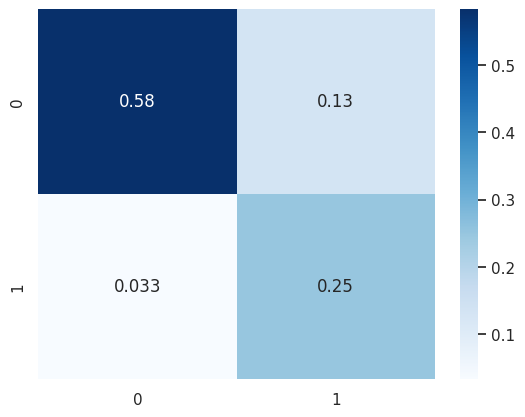

In [ ]:
def objective(trial, data):
  X, y = data
  param_grid = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 500),
      'max_depth': trial.suggest_int('max_depth', 3, 15),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
  }

  model = RandomForestClassifier(**param_grid, random_state=94)
  cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
  return np.mean(cv_scores)

data = (X_train1, y_train_smote)
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, data), n_trials=50)

print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

best_model = RandomForestClassifier(**study.best_params, random_state=94)
best_model.fit(X_train1, y_train_smote)

In [ ]:
y_pred_best = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
cm_best = cm_best/np.sum(cm_best)

print('\nROC AUC Score:')
print(roc_auc_score(y_test, y_pred_best))



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.65      0.88      0.75        17

    accuracy                           0.83        60
   macro avg       0.80      0.85      0.81        60
weighted avg       0.86      0.83      0.84        60


ROC AUC Score:
0.8481532147742818


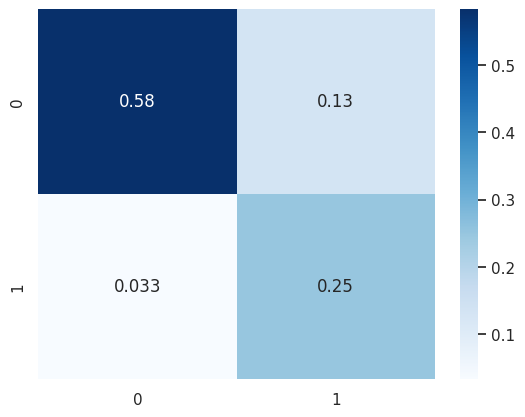

In [ ]:
sns.heatmap(cm_best, annot=True, cmap='Blues')
plt.show()

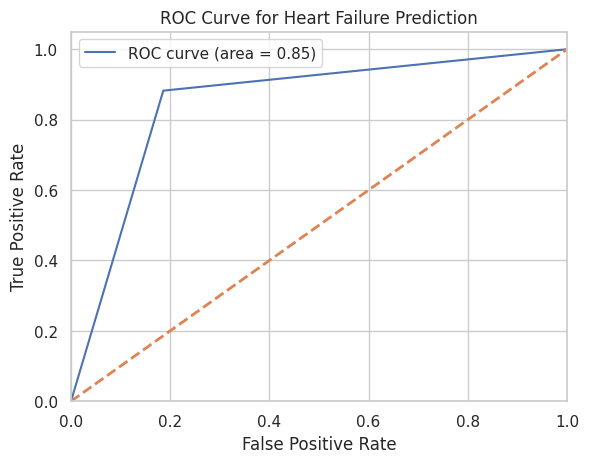

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction')
plt.legend()
plt.show()